# Dataset: Drug Type Prediction

## Context
As a beginner in machine learning, this dataset offers a great opportunity to apply various techniques to predict the outcome of drugs that may be suitable for a patient.

## Target Feature
- **Drug Type**: This is the target variable that needs to be predicted. It represents the type of drug that might be suitable for a given patient.

## Feature Set
The following features describe the characteristics of the patient:

| Feature                      | Description                                                  | Data Type   |
| ---------------------------- | ------------------------------------------------------------ | ----------- |
| **Age**                       | The age of the patient.                                      | Numerical   |
| **Sex**                       | The sex of the patient (Male/Female).                         | Categorical |
| **Blood Pressure Levels (BP)**| The blood pressure levels of the patient.                    | Categorical (e.g., Low/Normal/High) |
| **Cholesterol Levels**        | The cholesterol levels of the patient.                        | Categorical (e.g., Normal/High) |
| **Na to Potassium Ratio**     | The ratio of sodium to potassium in the patient’s body.       | Numerical   |
| **Drug type**     | The type drug that is consumed       | Categorical   |

## Inspiration
The goal is to explore various machine learning algorithms and techniques to predict the type of drug a patient should receive based on their health features. The challenge lies not only in working with these features but also in adopting a sound approach to solve the problem as a beginner in the field.

Good luck with your exploration and learning!


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from collections import Counter, deque
from matplotlib.patches import Patch, ConnectionPatch

<div style="background-color:red; padding:30px; border-radius:10px; font-size:30px; font-weight:700; text-align:center; font=family:'Poppins';">1 | Expoloratory Data Analysis</div>

<div style="background-color:white; color:red; padding:20px; border-radius:10px; font-size:20px; ; font:family:'Poppins';">Data Loading</div>

In [3]:
df = pd.read_csv('dataset/drug200.csv')
df_clean = df.copy()

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.shape

(200, 6)

`200` instances and `6` features (include with the target col)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


dominated with `object` columns, later we're going to encode them using label-encoding 

In [7]:
numeric_data = df.select_dtypes(include='number')
object_data = df.select_dtypes(include='object')

In [8]:
num_desc = df.describe(include='number').T
num_desc['nunique'] = [ df[col].nunique() for col in numeric_data ]
num_desc

,count,mean,std,min,25%,50%,75%,max,nunique
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000,57
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247,198


the nunique of age is almost half of total instance, meaning, at least we have 2 data with the same age + high magnitude

In [9]:
obj_desc = df.describe(include='object').T
obj_desc['unqiue'] = [ df[col].unique() for col in object_data ]
obj_desc

,count,unique,top,freq,unqiue
Sex,200,2,M,104,"[F, M]"
BP,200,3,HIGH,77,"[HIGH, LOW, NORMAL]"
Cholesterol,200,2,HIGH,103,"[HIGH, NORMAL]"
Drug,200,5,DrugY,91,"[DrugY, drugC, drugX, drugA, drugB]"


there are 5 types of drug (target)

<div style="background-color:white; color:red; padding:20px; border-radius:10px; font-size:20px; ; font:family:'Poppins';">Data Inconsistencies</div>

In [10]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [11]:
df.duplicated().sum()

0

great no missing values and duplications

In [12]:
plt.rcParams['figure.figsize'] = (15, 8)

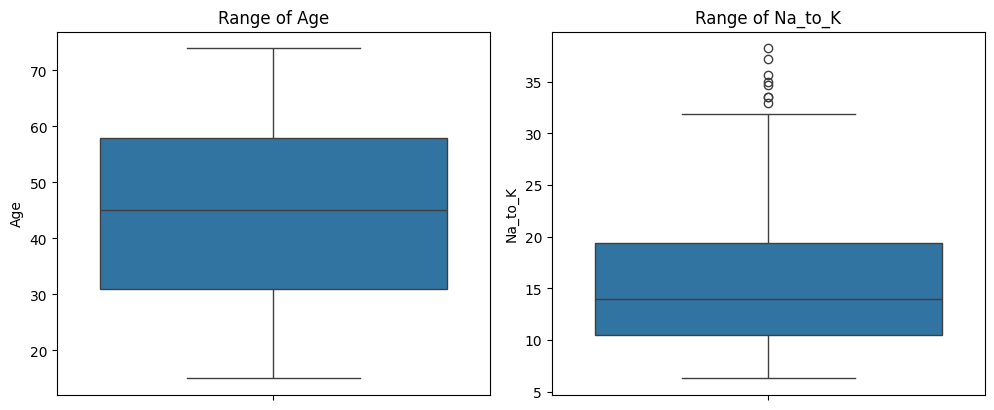

In [13]:
for i, col in enumerate(numeric_data):
    plt.subplot(2, 3, i+1)
    plt.title(f'Range of {col}')
    sns.boxplot(df[col])
plt.tight_layout()
plt.show()

In [14]:
def iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1 
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = data[(data < lower) | (data > upper)]
    return outliers

for i, col in enumerate(numeric_data):
    outliers = iqr(df[col])
    print(f'{len(outliers)} in {col}')

0 in Age
8 in Na_to_K


<div style="background-color:white; color:red; padding:20px; border-radius:10px; font-size:20px; ; font:family:'Poppins';">Univariate Analysis</div>

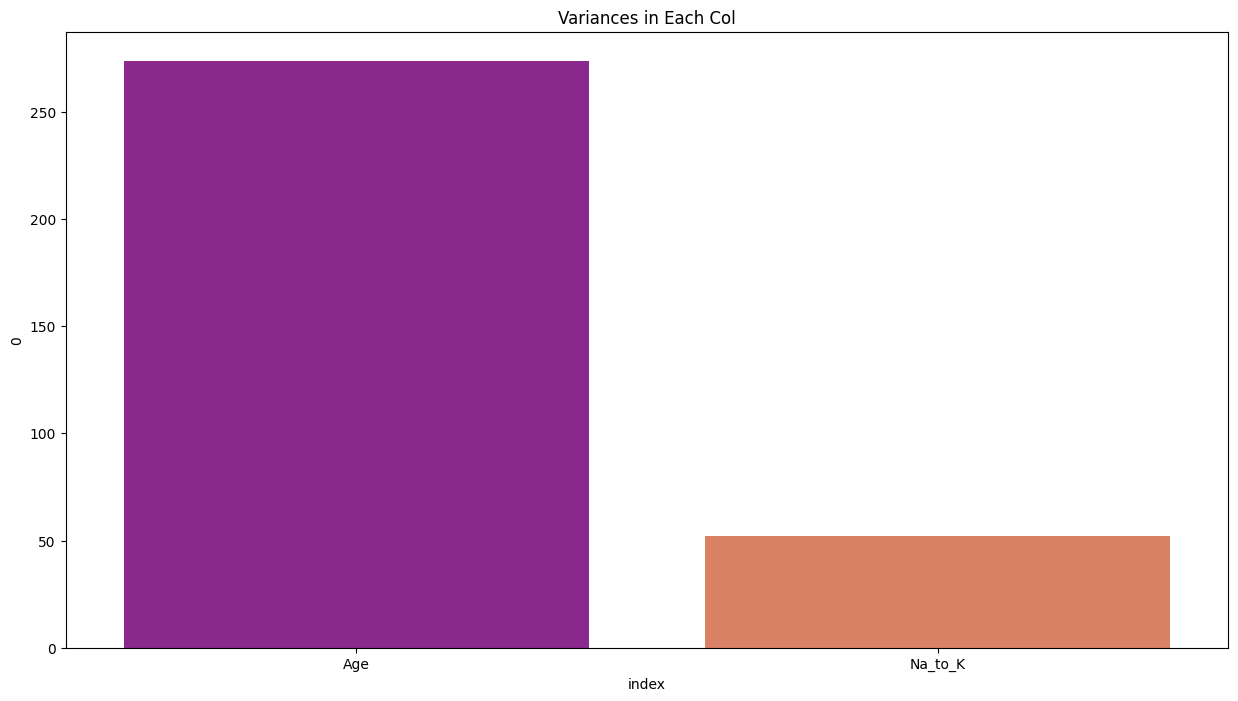

In [15]:
df_var = df.var(numeric_only=True).reset_index()
sns.barplot(y=df_var[0], x=df_var['index'],  hue=df_var['index'], palette='plasma')
plt.title('Variances in Each Col')
plt.show()

age is has quite high distance to its mean

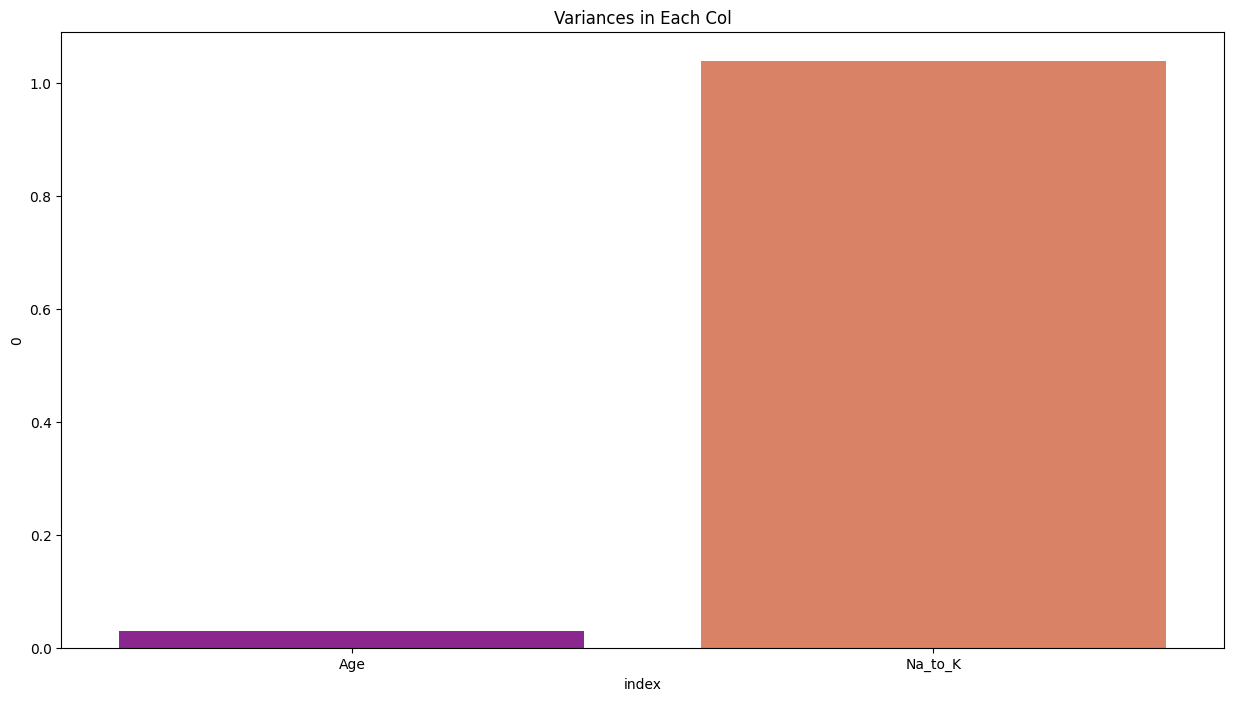

In [16]:
df_var = df.skew(numeric_only=True).reset_index()
sns.barplot(y=df_var[0], x=df_var['index'],  hue=df_var['index'], palette='plasma')
plt.title('Variances in Each Col')
plt.show()

the most skewed is na_to_k, but it is considerable

In [17]:
plt.rcParams['figure.figsize'] = (15, 12)

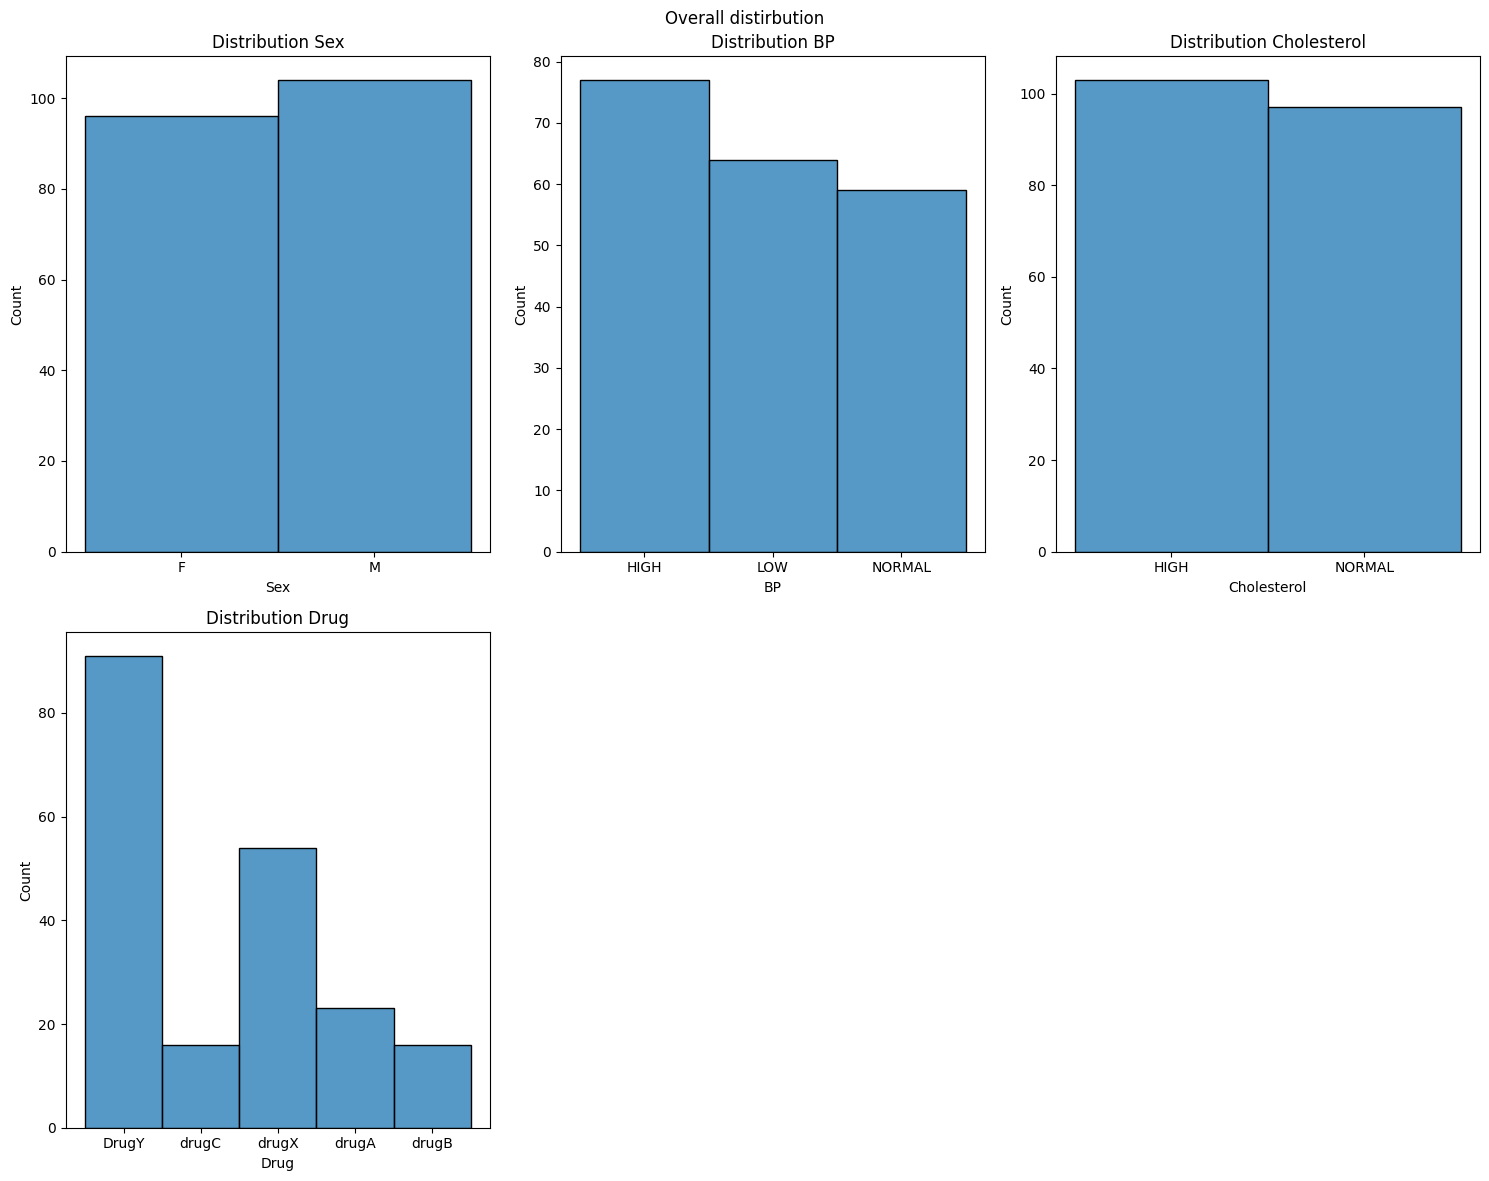

In [18]:
for i, col in  enumerate(df.select_dtypes(include='object')):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df,x=col,)
    plt.title(label=f'Distribution {col}')
plt.suptitle("Overall distirbution")
plt.tight_layout()
plt.show()

<div style="background-color:white; color:red; padding:20px; border-radius:10px; font-size:20px; ; font:family:'Poppins';">Bivariate Analysis</div>

### **Hidden insight 🥷**
- Most of distirubtion drug have skew to `Drug Y`, it might be effect to the model becouse overfitting
- Feature of `sex` and `Cholesterol` realitve normal distribte
- Blood Presure have dominiated with High BP and create stair down to normal

Conclusion: 

In [19]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


#### **Findings 🔍**
- Drug B have characteristic effect to Old people based on age
- while distribution of Drug Y have high `Na to K` 

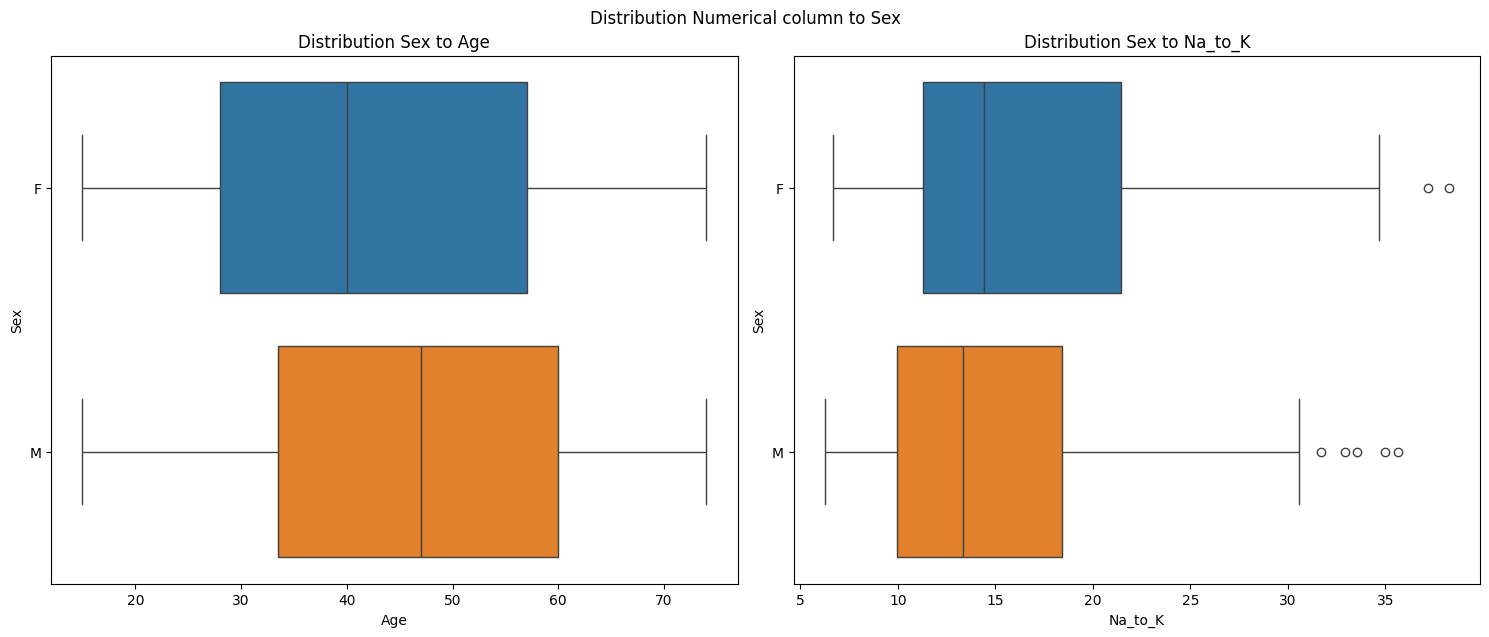

In [20]:
for i, col in  enumerate(df.select_dtypes(include='number')):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df,x=col, y='Sex', hue='Sex')
    plt.title(label=f'Distribution Sex to {col}')
plt.suptitle("Distribution Numerical column to Sex")
plt.tight_layout()
plt.show()

#### **Findings 🔍**
- Male have higher age with low sodium to potassium 
- Female have lower age with a bit higher sodium to potassium  in their body

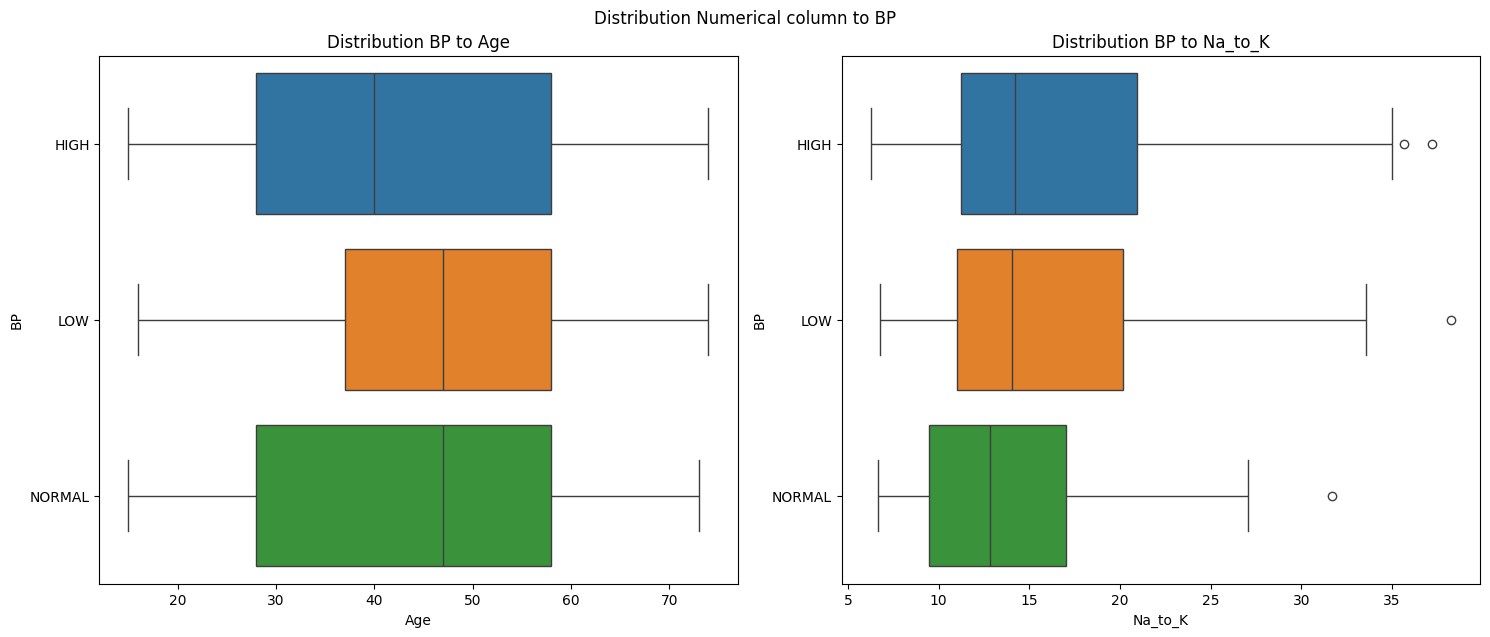

In [21]:
for i, col in  enumerate(df.select_dtypes(include='number')):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df,x=col, y='BP', hue='BP')
    plt.title(label=f'Distribution BP to {col}')
plt.suptitle("Distribution Numerical column to BP")
plt.tight_layout()
plt.show()

#### **Findings 🔍**
-  Blood Pressure to sodium potasium have lower Median and distribution, it means normal Blood Presure have lower sodium potasium



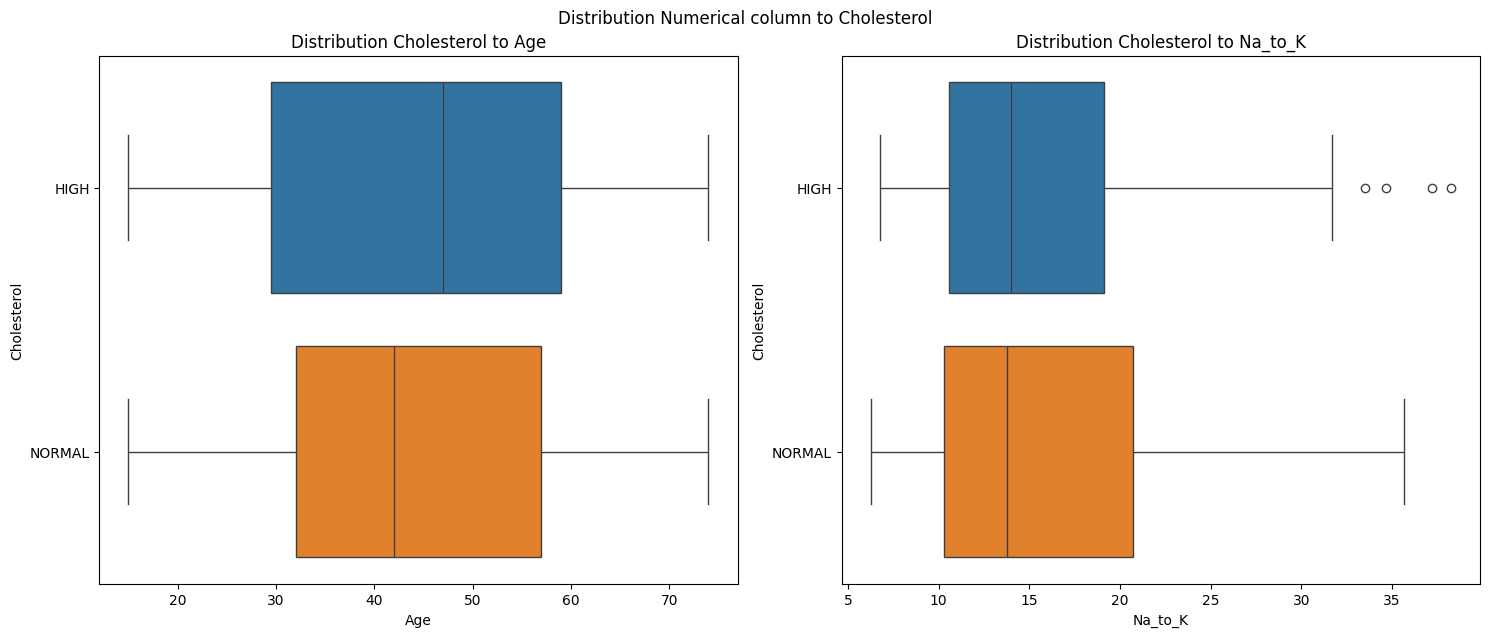

In [22]:
for i, col in  enumerate(df.select_dtypes(include='number')):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df,x=col, y='Cholesterol', hue='Cholesterol')
    plt.title(label=f'Distribution Cholesterol to {col}')
plt.suptitle("Distribution Numerical column to Cholesterol")
plt.tight_layout()
plt.show()

#### **Findings 🔍**
Cholestorol to Age hae a bit charateristic despite not significatly
- with lower age, mostly have Normal Cholestor 
- more higher the age, they have a high cholerstorol

In [23]:
df_clean['Age/Na_to_K'] = df_clean['Age'] / df_clean['Na_to_K']
df_clean['Na_to_K/Age'] =  df_clean['Na_to_K'] /  df_clean['Age']

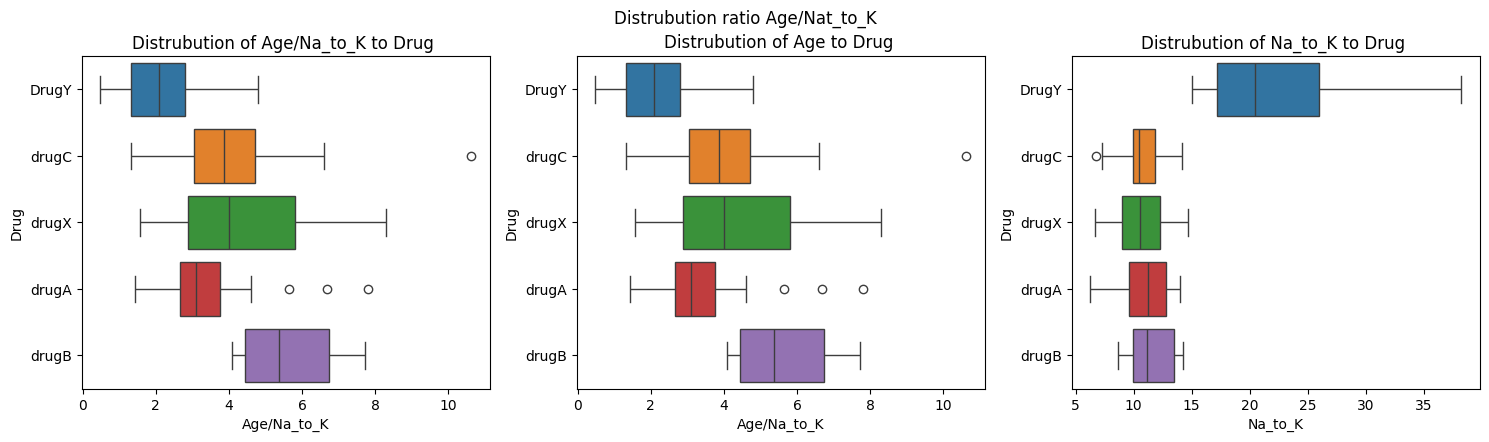

In [24]:
plt.subplot(3, 3, 1)
sns.boxplot(data=df_clean,x='Age/Na_to_K', y='Drug', hue='Drug')
plt.title("Distrubution of Age/Na_to_K to Drug ")


plt.subplot(3, 3, 2)
sns.boxplot(data=df_clean,x='Age/Na_to_K',y='Drug', hue='Drug')
plt.title("Distrubution of Age to Drug ")

plt.subplot(3, 3, 3)
sns.boxplot(data=df_clean,x='Na_to_K',y='Drug', hue='Drug')
plt.title("Distrubution of Na_to_K to Drug ")

plt.suptitle("Distrubution ratio Age/Nat_to_K")
plt.tight_layout()

In [25]:
df.describe()


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


### **Intepreation of ratio Age/Na_to_K**
after the we create new ratio, each drug have significat charateristic
*the ratio emphesize people with high age and high Na_to_K give insight people*

- Drug Y have the lower, it mean they have 

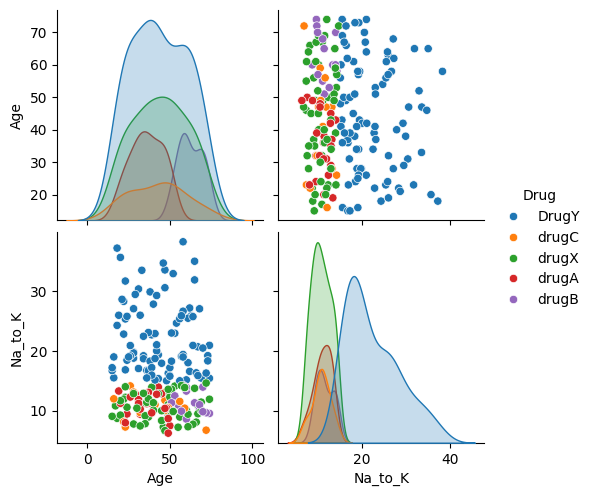

In [26]:
sns.pairplot(df, hue='Drug')

<div style="background-color:white; color:red; padding:20px; border-radius:10px; font-size:20px; ; font:family:'Poppins';">Pre Processing</div>

there are 8 outliers, let's remove this, because decision tree is sensitive to outliers, it may measure it in the threshold

In [27]:
for i, col in enumerate(numeric_data):
    outliers = iqr(df_clean[col])
    print(f'{len(outliers)} in {col} (before)')
    if len(outliers) != 0:
        indices = outliers.index.tolist()
        for drug in np.unique(df_clean['Drug']):
            filtered = df_clean.iloc[indices]
            updated_indices = filtered[filtered['Drug'] == drug].index.tolist()
            median = df_clean.loc[df_clean['Drug'] == drug, col].median()
            df_clean.loc[updated_indices, col] = median 
     
    outliers = iqr(df_clean[col])
    print(f'{len(outliers)} in {col} (after)')       

0 in Age (before)
0 in Age (after)
8 in Na_to_K (before)
0 in Na_to_K (after)


<div style="background-color:white; color:red; padding:20px; border-radius:10px; font-size:20px; ; font:family:'Poppins';">Feature Encoding</div>

in order for the categorical can be set as threshold / decision in the nodes 

In [28]:
def encoding(df_clean, cols):
    for col in cols:
        df_clean[col] = df_clean[col].astype('category').cat.codes
    return df_clean 

df_clean = encoding(df_clean, object_data.columns)
df_clean.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age/Na_to_K,Na_to_K/Age
0,23,0,0,0,25.355,0,0.907119,1.102391
1,47,1,1,0,13.093,3,3.589704,0.278574
2,47,1,1,0,10.114,3,4.647024,0.215191
3,28,0,2,0,7.798,4,3.590664,0.278500
4,61,0,1,0,18.043,0,3.380813,0.295787


<div style="background-color:white; color:red; padding:20px; border-radius:10px; font-size:20px; ; font:family:'Poppins';">Multivariate Analysis</div>

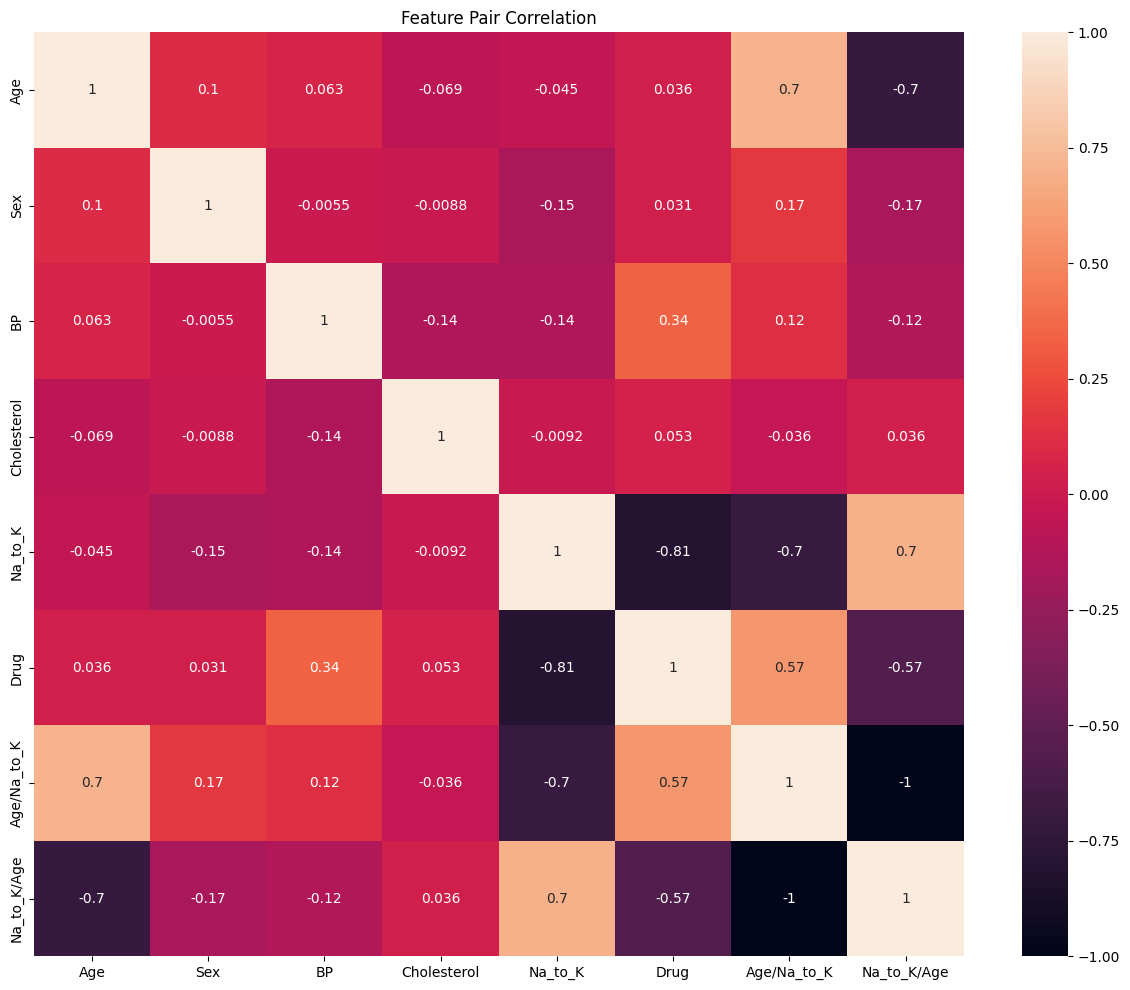

In [29]:
sns.heatmap(df_clean.corr(method='spearman'), annot=True)
plt.title('Feature Pair Correlation')
plt.show()

- `Na_to_K` has a good corr (linearly and non linear) with drug, there's a possibility Na_to_k used in decision node
- ratio `Na_to_k` and `age` emphasize that people with higher age has lower na to ka in exponential way

<div style="background-color:white; color:red; font-weight:400; padding:30px; border-radius:10px; font-size:25px; text-align:left; font=family:'Poppins';">Feature Selection</div>

`methods`: mutual information \
`consideration`: it measure the occurance of classes in independent var with dependent var at the same time \
`indicator`: the high the val, the more consistent they appear at the same time 

In [30]:
bins = int(np.log(len(df_clean)) + 1)
bins 

6

bins tell us how many group we can have based on the total instances. Why using `natural log`, in order to mimic the exponential growth naturally in this world

In [31]:
def mutual_information(crosstab):
    observed = np.array(crosstab.iloc[:-1, :-1])
    ratios = observed / np.sum(observed)
    Px = np.sum(ratios, axis=1, keepdims=True)
    Py = np.sum(ratios, axis=0, keepdims=True)
    nonzero = ratios > 0
    MI = np.sum(ratios[nonzero] * np.log(ratios[nonzero] / (Px @ Py)[nonzero]))
    return MI 

for i, col in enumerate(object_data):
    crosstab = pd.crosstab(df_clean[col], df_clean['Drug'], margins=True)
    MI = mutual_information(crosstab)
    print(f'{col} MI: {MI}')

for i, col in enumerate(numeric_data):
    X = np.array(df_clean[col])
    X = np.digitize(X, bins=np.linspace(X.min(), X.max(), bins))
    X_df = pd.DataFrame(X.T)
    crosstab = pd.crosstab(X_df[0], df_clean['Drug'], margins=True)
    MI = mutual_information(crosstab)
    print(f'{col} MI: {MI}')

Sex MI: 0.0053396473240812465
BP MI: 0.42983905803150885
Cholesterol MI: 0.06453629711668309
Drug MI: 1.3646545681202986
Age MI: 0.1441102107092785
Na_to_K MI: 0.5248884944833584


- it was right, Na_to_k have the highest MI out of all, its half of Drug and Drug MI. 
- Meaning, it consistenly appears together almost 50% of the time

<div style="background-color:white; color:red; font-weight:400; padding:30px; border-radius:10px; font-size:25px; text-align:left; font=family:'Poppins';">Cross Validation</div>

In [32]:
def accuracy_score(y_pred, y_test):
    return np.mean(y_pred == y_test) * 100

def cross_validation(X, y, model, k=5, pruning=False, alpha=0):
    n_samples = len(X)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    fold_size = n_samples // k
    accuracies = []

    for i in range(k):
        test_start = fold_size * i 
        test_end = test_start + fold_size if i < k - 1 else n_samples 
        test_indices = indices[test_start:test_end]
        train_indices = np.concatenate([indices[:test_start], indices[test_end:]])

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        model.fit(X_train, y_train.reshape(-1, 1))
        if pruning == 'ccp':
            model.cost_complexity_pruning(alpha=alpha)
        elif pruning == 'rep':
            model.reduced_error_pruning(X_test, y_test, model.root)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_pred, y_test)
        accuracies.append(accuracy)

    data = {
        'X_train': X_train, 'X_test': X_test, 
        'y_train': y_train, 'y_test': y_test, 
        'y_pred': y_pred, 'test_indices': test_indices, 'train_indices': train_indices,
        'accuracies': accuracies
    }

    return data 

In [33]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None, sample=None):
        self.feature_index = feature_index 
        self.threshold = threshold
        self.left = left
        self.right = right 
        self.info_gain = info_gain
        self.value = value
        self.sample = sample 
        

<div style="background-color:red; padding:30px; border-radius:10px; font-size:30px; font-weight:700; text-align:center; font=family:'Poppins';">2 | Modelling</div>

In [34]:
class DecisionTreeClassifier:

    
    def __init__(self, max_depth=4, min_samples_split=2, min_samples_leaf=1, features=None, mode='entropy'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.features = features
        self.mode = mode 

        # the root of the tree
        self.root = None

        # features count of recalls and total impurity
        self.feature_importance = None




    """========BUILDING TREE FUNCTION========"""
    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape 

        if self.features != None:
            features = self.features
        else:
            features = np.arange(n_features)

        if n_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            best_split = self.get_best_split(dataset, n_samples, features)

            if best_split['info_gain']>0 and len(best_split['dataset_left'])>=self.min_samples_leaf and len(best_split['dataset_right'])>=self.min_samples_leaf:
                feature_index = best_split['feature_index']

                self.feature_importance[0][feature_index] += best_split['info_gain']
                self.feature_importance[1][feature_index] += 1

                left_subtree = self.build_tree(best_split['dataset_left'], curr_depth+1)
                right_subtree = self.build_tree(best_split['dataset_right'], curr_depth+1)

                return Node(
                    feature_index=feature_index,
                    threshold=best_split['threshold'],
                    left=left_subtree,
                    right=right_subtree,
                    info_gain=best_split['info_gain'],
                    sample=Y
                )

        leaf_value = self.calc_leaf_value(Y)
        return Node(value=leaf_value, sample=Y)
    
    def get_best_split(self, dataset, n_samples, features):
        best_split = {}
        max_info_gain = -float('inf')
        
        for feature_index in features:
            possible_thresholds = np.unique(dataset[:, feature_index])

            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)

                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]

                    curr_info_gain = self.information_gain(y, left_y, right_y, self.mode)

                    if curr_info_gain > max_info_gain:
                        best_split = {
                            'feature_index':feature_index,
                            'threshold':threshold,
                            'dataset_left':dataset_left,
                            'dataset_right':dataset_right,
                            'info_gain':curr_info_gain,
                        }
                        max_info_gain = curr_info_gain
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
        return dataset_left, dataset_right
            
    def calc_leaf_value(self, Y):
        Y = list(Y)
        return max(Y, key=Y.count)
    



    """========IMPURITY FUNCTIONS========"""
    def information_gain(self, parent, l_child, r_child, mode):
        l_weight = len(l_child) / len(parent)
        r_weight = len(r_child) / len(parent)
        if mode == 'gini':
            gain = self.gini(parent) - (l_weight*self.gini(l_child) + r_weight*self.gini(r_child))
        else:
            gain = self.entropy(parent) - (l_weight*self.entropy(l_child) + r_weight*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log(p_cls)
        return entropy
    
    def gini(self, y):
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls ** 2
        return 1 - gini
    



    """========POST PRUNING METHODS CCP AND REP========"""
    def cost_complexity_pruning(self, alpha=0.01, tree=None):
        if tree is None:
            tree = self.root 

        if tree.left and tree.right:
            self.cost_complexity_pruning(alpha, tree.left)
            self.cost_complexity_pruning(alpha, tree.right)

            left_cost = self._calc_subtree_cost(tree.left)
            right_cost = self._calc_subtree_cost(tree.right)

            if (left_cost + right_cost - 1) * alpha >= tree.info_gain:
                tree.value = self.calc_leaf_value([leaf.value for leaf in self._get_leaves(tree)])  
                tree.left = None 
                tree.right = None 

    def _get_leaves(self, tree=None):
        if tree.value is not None:
            return [tree]
        return self._get_leaves(tree.left) + self._get_leaves(tree.right)
    
    def _calc_subtree_cost(self, tree=None):
        if tree is not None:
            return 0
        
        if tree.value is not None:
            y = np.array(tree.sample)
            if self.mode == 'gini':
                return self.gini(y)
            else:
                return self.entropy(y)
            
        left_cost = self._calc_subtree_cost(tree.left)
        right_cost = self._calc_subtree_cost(tree.right)
        return left_cost + right_cost + 1

    def reduced_error_pruning(self, X_test, y_test, node):
        if node.left and node.right:
            self.reduced_error_pruning(X_test, y_test, node.left)
            self.reduced_error_pruning(X_test, y_test, node.right)

            if node.left.value is not None and node.right.value is not None:
                accuracy_before = np.mean(self.predict(X_test) == y_test)

                node.value = self.calc_leaf_value(y_test)
                accuracy_pruned = np.mean(self.predict(X_test) == y_test)

                if accuracy_pruned >= accuracy_before:
                    node.left = None
                    node.right = None
                else:
                    node.value = None




    """========FIT AND PREDICT FUNC========"""
    def fit(self, X, Y):
        dataset = np.concatenate((X, Y), axis=1)
        self.feature_importance = np.zeros([2, X.shape[1]+1])
        self.root = self.build_tree(dataset)


    def predict(self, X):
        predictions = [self.make_predictions(x, self.root) for x in X]
        return predictions
    
    def make_predictions(self, x, tree=None):
        if tree.value is not None:
            return tree.value 
        
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_predictions(x, tree.left)
        else:
            return self.make_predictions(x, tree.right)
        
    def print_tree(self, node=None, depth=0):
        if node is None:
            node = self.root
            
        # Base case: if it's a leaf node
        if node.value is not None:
            print(f"{'  ' * depth}Leaf: Class {node.value} (Samples: {dict(Counter(node.sample))} | Depth: {depth}) ")
            return
        
        # Internal node
        print(f"{'  ' * depth}Feature {node.feature_index} <= {node.threshold} (Info Gain: {node.info_gain:.4f} | Depth: {depth})")
        
        # Recurse into left and right subtrees
        self.print_tree(node.left, depth + 1)
        self.print_tree(node.right, depth + 1)

    

    """========LEAF EVALUATION FUNC========"""
    def get_leaf_info(self, x, tree=None, node_id=0):
        if tree is None:
            tree = self.root 

        if tree.value is not None:
            count = Counter(tree.sample)
            ratio = {k: round(v / len(tree.sample), 2) for k, v in count.items()}
            return node_id, ratio 
        
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.get_leaf_info(x, tree.left, node_id * 2 + 1)
        else:
            return self.get_leaf_info(x, tree.right, node_id * 2 + 2)
        
    def get_all_leaf_into(self, tree=None, node_id=0, leaf_info=None):
        if leaf_info is None:
            leaf_info = {}

        if tree is None:
            tree = self.root 

        if tree.value is not None:
            print(len(tree.sample), tree.value)
            print(node_id)
            count = Counter(tree.sample)
            ratio = {k: round(v / len(tree.sample), 2) for k, v in count.items()}
            leaf_info[node_id] = ratio
            return leaf_info
        
        # recursively traverse all over the subtrees / nodes to ge the leaves info
        self.get_all_leaf_into(tree.left, node_id * 2 + 1, leaf_info)
        self.get_all_leaf_into(tree.right, node_id * 2 + 2, leaf_info)

        return leaf_info



re-ordering column, the `target` col is always in the foremost right

In [35]:
drug_list = df_clean['Drug'].values 
df_clean = df_clean.drop('Drug', axis=1)
df_clean['Drug'] = drug_list
df_clean.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Age/Na_to_K,Na_to_K/Age,Drug
0,23,0,0,0,25.355,0.907119,1.102391,0
1,47,1,1,0,13.093,3.589704,0.278574,3
2,47,1,1,0,10.114,4.647024,0.215191,3
3,28,0,2,0,7.798,3.590664,0.278500,4
4,61,0,1,0,18.043,3.380813,0.295787,0


independent vars and dependent vars

In [36]:
X = df_clean.iloc[:, :-1].values
Y = df_clean.iloc[:, -1].values

### `Scenario 1`: Minimum Limitations
max depth set to inf, split and leaf set to most minimm, feature none and mode gini to emphasize more the dominant class

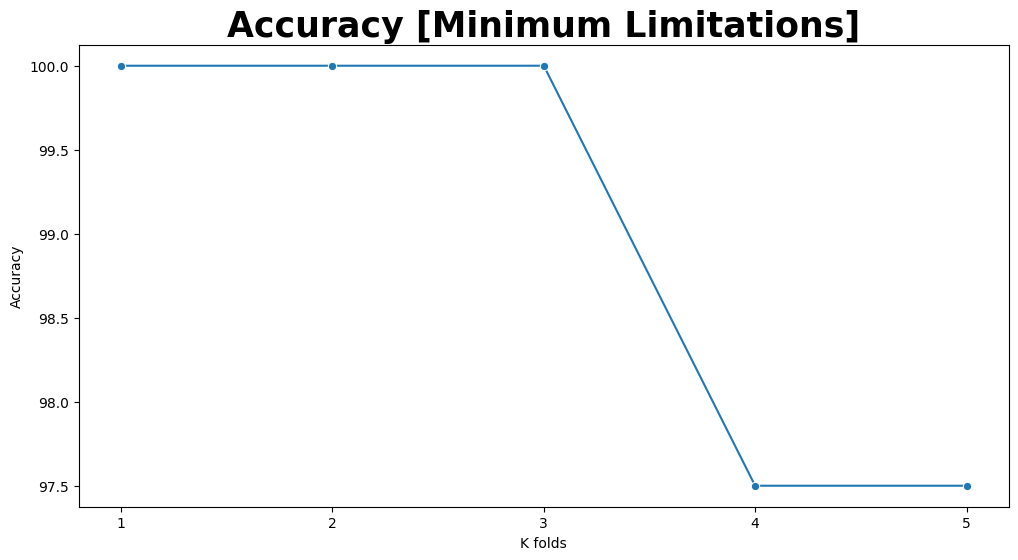

Avg Accuracy: 99.0


In [37]:
model = DecisionTreeClassifier(max_depth=float('inf'), min_samples_split=2, min_samples_leaf=1, features=None, mode='gini')
data = cross_validation(X, Y, model, k=5, pruning=False)
plt.figure(figsize=(12, 6))
sns.lineplot(data['accuracies'], marker='o')
plt.title('Accuracy [Minimum Limitations]', size=25, weight='bold')
plt.xlabel('K folds')
plt.ylabel('Accuracy')
plt.xticks(range(0, 5, 1), range(1, 6, 1))
plt.show()
avg_accuracy = np.mean(data['accuracies'])
print(f'Avg Accuracy: {avg_accuracy}')

In [38]:
model.print_tree()

Feature 4 <= 14.642 (Info Gain: 0.3248 | Depth: 0)
  Feature 2 <= 0.0 (Info Gain: 0.2638 | Depth: 1)
    Feature 0 <= 49.0 (Info Gain: 0.4959 | Depth: 2)
      Leaf: Class 1.0 (Samples: {1.0: 18} | Depth: 3) 
      Leaf: Class 2.0 (Samples: {2.0: 15} | Depth: 3) 
    Feature 3 <= 0.0 (Info Gain: 0.1344 | Depth: 2)
      Feature 2 <= 1.0 (Info Gain: 0.4993 | Depth: 3)
        Leaf: Class 3.0 (Samples: {3.0: 14} | Depth: 4) 
        Leaf: Class 4.0 (Samples: {4.0: 13} | Depth: 4) 
      Leaf: Class 4.0 (Samples: {4.0: 26} | Depth: 3) 
  Leaf: Class 0.0 (Samples: {0.0: 74} | Depth: 1) 


the tree growth until level 3 (level 0, 1, 2, 3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_17588\254375908.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(feature_importance[0], palette='plasma')


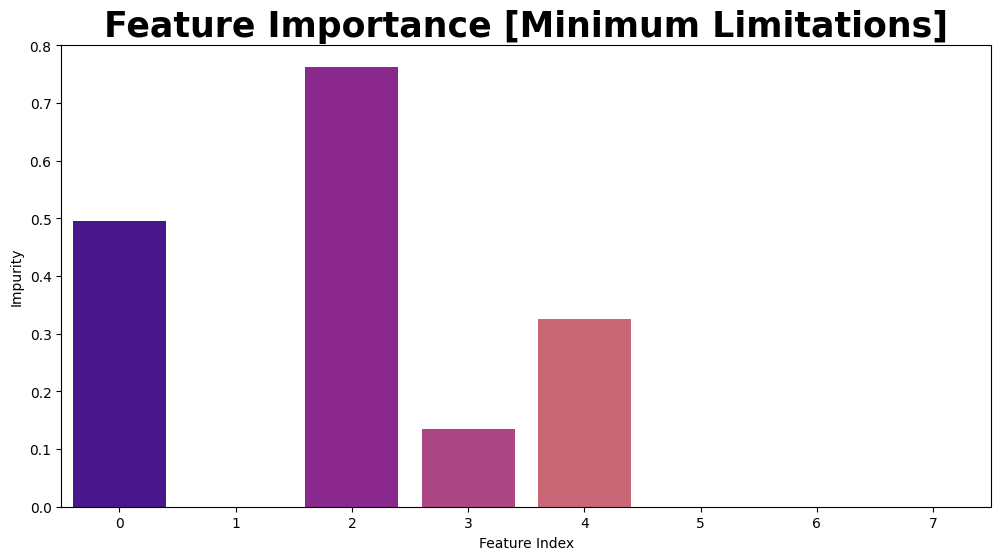

feature index 0 count: 1
feature index 1 count: 0
feature index 2 count: 2
feature index 3 count: 1
feature index 4 count: 1
feature index 5 count: 0
feature index 6 count: 0
feature index 7 count: 0


In [39]:
feature_importance = model.feature_importance
plt.figure(figsize=(12, 6))
sns.barplot(feature_importance[0], palette='plasma')
plt.title('Feature Importance [Minimum Limitations]', size=25, weight='bold')
plt.xlabel('Feature Index')
plt.ylabel('Impurity')
plt.show()
for i, count in enumerate(feature_importance[1]):
    print(f'feature index {i} count: {int(count)}')

In [40]:
df_clean.columns 

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Age/Na_to_K',
       'Na_to_K/Age', 'Drug'],
      dtype='object')

feature with index 2 becomes decision node for 2 times (Blood Preasure)

In [41]:
model.get_all_leaf_into()

18 1.0
7
15 2.0
8
14 3.0
19
13 4.0
20
26 4.0
10
74 0.0
2


{7: {1.0: 1.0},
 8: {2.0: 1.0},
 19: {3.0: 1.0},
 20: {4.0: 1.0},
 10: {4.0: 1.0},
 2: {0.0: 1.0}}

In [42]:
for key, val in model.get_all_leaf_into().items():
    print(f'Node id {key}: {val}')

18 1.0
7
15 2.0
8
14 3.0
19
13 4.0
20
26 4.0
10
74 0.0
2
Node id 7: {1.0: 1.0}
Node id 8: {2.0: 1.0}
Node id 19: {3.0: 1.0}
Node id 20: {4.0: 1.0}
Node id 10: {4.0: 1.0}
Node id 2: {0.0: 1.0}


### `Scenario 2`: Pre Pruning Combinitions

In [43]:
from itertools import product

max_depths = [1, 3]
min_sample_splits = [5, 15]
min_sample_leafs = [1, 2]
features = [None, [2, 4]]
modes = ['entropy', 'gini']

param_combinitions = list(product(max_depths, min_sample_splits, min_sample_leafs, features, modes))

print(f'Total combinitions: {len(param_combinitions)}')

Total combinitions: 32


In [44]:
accuracies = []
for param in param_combinitions:
    max_depth = param[0]
    min_sample_split = param[1]
    min_sample_leaf = param[2]
    feature = param[3]
    mode = param[4]
    model = DecisionTreeClassifier(max_depth, min_sample_split, min_sample_leaf, feature, mode)
    data = cross_validation(X, Y, model, k=5, pruning=False)
    accuracy = np.mean(data['accuracies'])
    accuracies.append(accuracy)

In [45]:
indices = np.argsort(accuracies)[::-1]
top_3 = [param_combinitions[i] for i in indices[:3]]
least_3 = [param_combinitions[i] for i in indices[-3:]]
print(f'Accuracies Top 3: {top_3}')
print(np.array(accuracies)[indices[:3]])
print(f'Accuracies Least 3: {least_3}')
print(np.array(accuracies)[indices[-3:]])

Accuracies Top 3: [(3, 15, 2, None, 'gini'), (3, 15, 2, None, 'entropy'), (3, 15, 1, None, 'gini')]
[99. 99. 99.]
Accuracies Least 3: [(3, 5, 2, [2, 4], 'entropy'), (3, 15, 2, [2, 4], 'entropy'), (3, 5, 1, [2, 4], 'entropy')]
[78. 77. 77.]


other paramteres are not so beneficial, except for feature, when being limited, it reduces the accuracy

### `Scenario 3`: Post Pruning CCP 

In [46]:
alphas = np.linspace(0, 0.1, 20)

In [47]:
accuracies = []
for alpha in alphas:
    model = DecisionTreeClassifier(max_depth=2, min_samples_split=2, min_samples_leaf=1, features=None, mode='gini')
    data = cross_validation(X, Y, model, k=5, pruning='ccp', alpha=alpha)
    accuracy = np.mean(data['accuracies'])
    accuracies.append(accuracy)

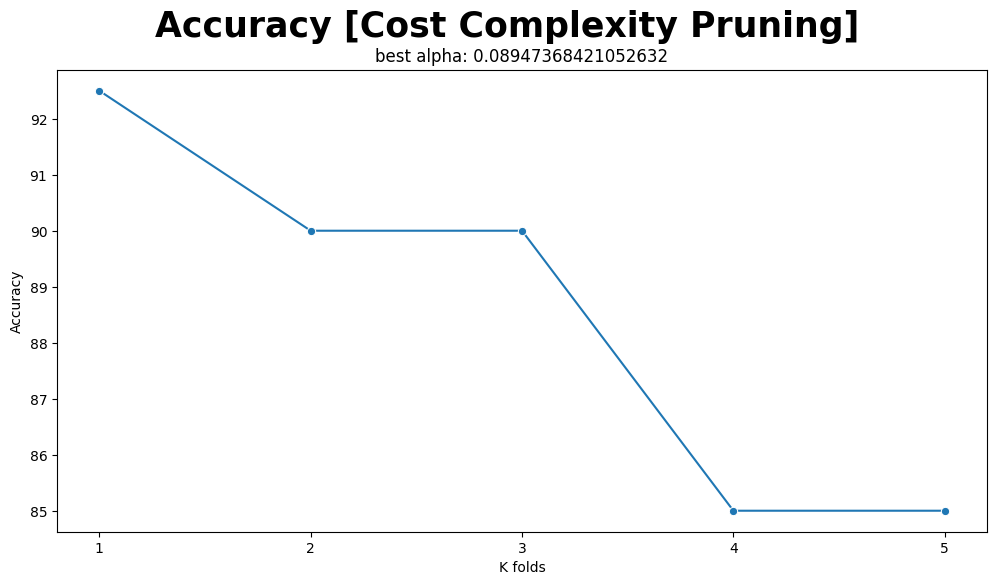

Avg Accuracy: 88.5


In [48]:
best_alpha = alphas[np.argmax(accuracies)]
model = DecisionTreeClassifier(max_depth=2, min_samples_split=2, min_samples_leaf=1, features=None, mode='entropy')
data = cross_validation(X, Y, model, k=5, pruning='ccp', alpha=best_alpha)

plt.figure(figsize=(12, 6))
sns.lineplot(data['accuracies'], marker='o')
plt.suptitle('Accuracy [Cost Complexity Pruning]', size=25, weight='bold')
plt.title(f'best alpha: {best_alpha}')
plt.xlabel('K folds')
plt.ylabel('Accuracy')
plt.xticks(range(0, 5, 1), range(1, 6, 1))
plt.show()
avg_accuracy = np.mean(data['accuracies'])
print(f'Avg Accuracy: {avg_accuracy}')

In [49]:
model.print_tree()

Feature 4 <= 14.642 (Info Gain: 0.6893 | Depth: 0)
  Feature 2 <= 0.0 (Info Gain: 0.6442 | Depth: 1)
    Feature 0 <= 50.0 (Info Gain: 0.6842 | Depth: 2)
      Leaf: Class 1.0 (Samples: {1.0: 17} | Depth: 3) 
      Leaf: Class 2.0 (Samples: {2.0: 13} | Depth: 3) 
    Feature 2 <= 1.0 (Info Gain: 0.1784 | Depth: 2)
      Leaf: Class 4.0 (Samples: {4.0: 14, 3.0: 10} | Depth: 3) 
      Leaf: Class 4.0 (Samples: {4.0: 33} | Depth: 3) 
  Leaf: Class 0.0 (Samples: {0.0: 73} | Depth: 1) 


simpler tree, its a balance between tree complexity and accuracy

### `Scenario 4`: Post Pruning REP 

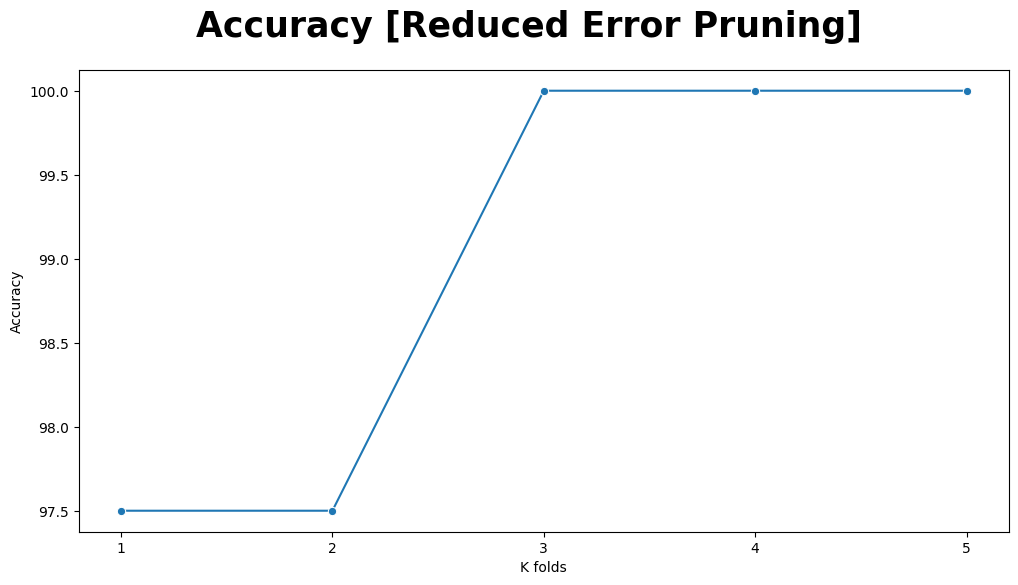

Avg Accuracy: 99.0


In [50]:
model = DecisionTreeClassifier(max_depth=float('inf'), min_samples_split=2, min_samples_leaf=1, features=None, mode='entropy')
data = cross_validation(X, Y, model, k=5, pruning='rep')

plt.figure(figsize=(12, 6))
sns.lineplot(data['accuracies'], marker='o')
plt.suptitle('Accuracy [Reduced Error Pruning]', size=25, weight='bold')
plt.xlabel('K folds')
plt.ylabel('Accuracy')
plt.xticks(range(0, 5, 1), range(1, 6, 1))
plt.show()
avg_accuracy = np.mean(data['accuracies'])
print(f'Avg Accuracy: {avg_accuracy}')

## Tree Visualization

In [51]:
model.print_tree()

Feature 4 <= 14.642 (Info Gain: 0.6868 | Depth: 0)
  Feature 2 <= 0.0 (Info Gain: 0.6748 | Depth: 1)
    Feature 0 <= 50.0 (Info Gain: 0.6870 | Depth: 2)
      Leaf: Class 1.0 (Samples: {1.0: 20} | Depth: 3) 
      Leaf: Class 2.0 (Samples: {2.0: 16} | Depth: 3) 
    Feature 2 <= 1.0 (Info Gain: 0.1849 | Depth: 2)
      Feature 3 <= 0.0 (Info Gain: 0.6870 | Depth: 3)
        Leaf: Class 3.0 (Samples: {3.0: 12} | Depth: 4) 
        Leaf: Class 4.0 (Samples: {4.0: 15} | Depth: 4) 
      Leaf: Class 4.0 (Samples: {4.0: 26} | Depth: 3) 
  Leaf: Class 0.0 (Samples: {0.0: 71} | Depth: 1) 


[56.        0.        1.        0.       11.567     4.841359  0.206554
  3.      ]
Final: Class 3.0


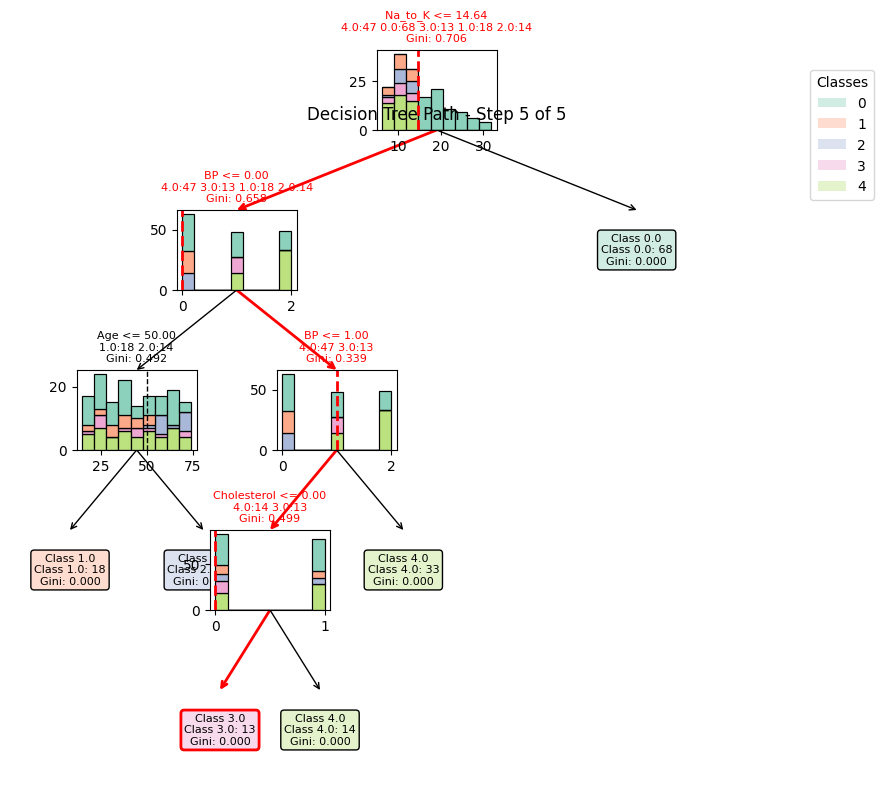

In [52]:
class TreeVisualization:
    def __init__(self, tree, data_df, target_col, feature_names):
        self.tree = tree
        self.data_df = data_df
        self.target_col = target_col
        self.feature_names = feature_names
        self.mode = tree.mode  # Store the impurity mode (gini or entropy)
        self.palette = self._create_color_palette()
        self.node_cache = {}
        self._cache_nodes(tree.root)
        
    def _create_color_palette(self):
        classes = np.unique(self.data_df[self.target_col])
        return dict(zip(classes, sns.color_palette("Set2", n_colors=len(classes))))
    
    def _calculate_impurity(self, y):
        """Calculate impurity based on the tree's mode"""
        if self.mode == 'gini':
            return self._calculate_gini(y)
        else:
            return self._calculate_entropy(y)
            
    def _calculate_entropy(self, y):
        """Calculate entropy impurity"""
        class_counts = Counter(y)
        total_samples = len(y)
        entropy = 0
        for count in class_counts.values():
            p = count / total_samples
            entropy += -p * np.log2(p)
        return entropy
        
    def _calculate_gini(self, y):
        """Calculate Gini impurity"""
        class_counts = Counter(y)
        total_samples = len(y)
        gini = 1
        for count in class_counts.values():
            p = count / total_samples
            gini -= p ** 2
        return gini
    
    def _cache_nodes(self, root):
        """Pre-cache all nodes for faster lookup"""
        queue = deque([root])
        while queue:
            node = queue.popleft()
            self.node_cache[id(node)] = node
            if hasattr(node, 'left') and node.left:
                queue.extend([node.left, node.right])
    
    def get_prediction_path(self, x):
        """Helper method to get prediction path and decisions"""
        path = []
        decisions = []
        node = self.tree.root
        
        while node.value is None:
            path.append(node)
            feature_val = x[node.feature_index]
            if isinstance(feature_val, (int, float)):
                val_str = f"{feature_val:.2f}"
                thresh_str = f"{node.threshold:.2f}" if isinstance(node.threshold, (int, float)) else str(node.threshold)
            else:
                val_str = str(feature_val)
                thresh_str = str(node.threshold)
                
            if feature_val <= node.threshold:
                decisions.append(f"Step {len(path)}: {self.feature_names[node.feature_index]} = {val_str} ≤ {thresh_str}")
                node = node.left
            else:
                decisions.append(f"Step {len(path)}: {self.feature_names[node.feature_index]} = {val_str} > {thresh_str}")
                node = node.right
                
        path.append(node)
        decisions.append(f"Final: Class {node.value}")
        return path, decisions
    
    def plot_prediction_path(self, x=None, step=None, fig=None, ax=None):
        if fig is None:
            fig = plt.figure(figsize=(8, 8))
        if ax is None:
            ax = fig.add_subplot(111)
        
        ax.clear()
        ax.set_axis_off()
    
        node_width = 0.15
        node_height = 0.1
        level_height = 0.2
        node_boxes = {}
        path_ids = []
        decisions = []
    
        def get_node_positions(node, level=0, x=0.5):
            positions = {id(node): (x, 1 - level * level_height)}
            if hasattr(node, 'left') and node.left:
                spacing = 0.25 / (level + 1)
                positions.update(get_node_positions(node.left, level + 1, x - spacing))
                positions.update(get_node_positions(node.right, level + 1, x + spacing))
            return positions
    
        node_positions = get_node_positions(self.tree.root)
    
        if x is not None:
            prediction_path, decisions = self.get_prediction_path(x)
            if step is not None:
                prediction_path = prediction_path[:step]
            path_ids = [id(node) for node in prediction_path]
    
        for node_id, (x_pos, y) in node_positions.items():
            node = self.node_cache[node_id]
            node_ax = fig.add_axes([x_pos - node_width/2, y - node_height/2, node_width, node_height])
            node_boxes[node_id] = [x_pos - node_width/2, y - node_height/2, node_width, node_height]
            
            if node.value is not None:
                self._draw_leaf_node(node_ax, node, is_active=(node_id in path_ids))
            else:
                self._draw_decision_node(node_ax, node, is_active=(node_id in path_ids))
    
        self._draw_connections(node_positions, node_boxes, path_ids, ax)
    
        # Add legend
        legend_elements = [
            Patch(facecolor=self.palette[cls], alpha=0.3, label=cls)
            for cls in sorted(self.data_df[self.target_col].unique())
        ]
        ax.legend(handles=legend_elements,
                  loc='upper right',
                  bbox_to_anchor=(1.2, 1.2),
                  title="Classes")
    
        if x is not None:
            if step is not None:
                title = f"Decision Tree Path - Step {step} of {len(decisions)}"
            else:
                prediction = self.tree.predict([x])[0]
                title = f"Complete Decision Path\nFinal Prediction: Class {prediction}"
        else:
            title = f"Complete Decision Tree Visualization\nImpurity Measure: {self.mode.capitalize()}"
        
        fig.suptitle(title, fontsize=12)
        return fig, ax
    
    def _draw_leaf_node(self, ax, node, is_active):
        ax.axis('off')
        edge_color = 'red' if is_active else 'black'
        line_width = 2 if is_active else 1
        
        distribution = Counter(node.sample)
        dist_str = "\n".join([f"Class {k}: {v}" for k, v in distribution.items()])
        impurity = self._calculate_impurity(node.sample)
        impurity_name = "Gini" if self.mode == 'gini' else "Entropy"
        txt = f"Class {node.value}\n{dist_str}\n{impurity_name}: {impurity:.3f}"
        
        majority_class = max(distribution.items(), key=lambda x: x[1])[0]
        bg_color = self.palette[majority_class]
        
        ax.text(0.5, 0.5, txt,
                ha='center', va='center',
                bbox=dict(boxstyle="round", 
                          fc=(*bg_color, 0.3),
                          ec=edge_color, 
                          linewidth=line_width),
                fontsize=8)
    
    def _draw_decision_node(self, ax, node, is_active):
        edge_color = 'red' if is_active else 'black'
        line_width = 2 if is_active else 1
        
        feature_data = self.data_df[self.feature_names[node.feature_index]]
        sns.histplot(
            data=self.data_df,
            x=self.feature_names[node.feature_index],
            hue=self.target_col,
            palette=self.palette,
            multiple="stack",
            ax=ax
        )
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.axvline(node.threshold, color=edge_color, 
                   linestyle='--', linewidth=line_width)
        
        # Remove legend if it exists
        if ax.get_legend() is not None:
            ax.get_legend().remove()
        
        distribution = Counter(node.sample)
        dist_str = " ".join([f"{k}:{v}" for k, v in distribution.items()])
        impurity = self._calculate_impurity(node.sample)
        impurity_name = "Gini" if self.mode == 'gini' else "Entropy"
        
        # Conditional formatting: if threshold is numeric, format with :.2f; otherwise, use str().
        if isinstance(node.threshold, (int, float)):
            threshold_str = f"{node.threshold:.2f}"
        else:
            threshold_str = str(node.threshold)
            
        title = f"{self.feature_names[node.feature_index]} <= {threshold_str}\n{dist_str}\n{impurity_name}: {impurity:.3f}"
        ax.set_title(title, fontsize=8, color=edge_color)
    
    def _draw_connections(self, node_positions, node_boxes, path_ids, main_ax):
        for node_id in node_positions:
            node = self.node_cache[node_id]
            if hasattr(node, 'left') and node.left:
                for child in [node.left, node.right]:
                    is_active = node_id in path_ids and id(child) in path_ids
                    self._draw_connection(node, child, node_boxes, is_active, main_ax)
    
    def _draw_connection(self, parent, child, node_boxes, is_active, main_ax):
        color = 'red' if is_active else 'black'
        width = 2 if is_active else 1
        
        parent_box = node_boxes[id(parent)]
        child_box = node_boxes[id(child)]
        
        con = ConnectionPatch(
            xyA=(parent_box[0] + parent_box[2]/2, parent_box[1]),
            xyB=(child_box[0] + child_box[2]/2, child_box[1] + child_box[3]),
            coordsA="figure fraction", coordsB="figure fraction",
            axesA=main_ax, axesB=main_ax,
            arrowstyle="->", color=color, linewidth=width
        )
        main_ax.add_artist(con)

# -----------------------------------------------------------------------------
# Example usage
def main():
    # Load and prepare data
    feature_names = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
    target_col = 'Drug'
    
    # Split the data
    X = df_clean[feature_names].values
    Y = df_clean[target_col].values 
    
    # Create and train the tree with gini impurity
    model = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1, max_depth=float('inf'), mode='gini')
    data = cross_validation(X, Y, model, k=5, pruning='rep')
    
    # Prepare data for visualization
    data_df = pd.DataFrame(data['X_train'], columns=feature_names)
    data_df[target_col] = data['y_train'].flatten()
    
    # Create visualization objects
    viz_gini = TreeVisualization(model, data_df, target_col, feature_names)
    
    # Visualize complete trees
    new_instance = np.array([56,0,1,0,11.567,4.841359,0.206554,3])
    print(new_instance)
    step = 5
    fig, ax = viz_gini.plot_prediction_path(new_instance, step=step)
    anjay, mantap = viz_gini.get_prediction_path(new_instance)
    print(mantap[step-1])
    plt.show()
    
if __name__ == "__main__":
    main()

[56.        0.        1.        0.       11.567     4.841359  0.206554
  3.      ]
Final: Class 3.0


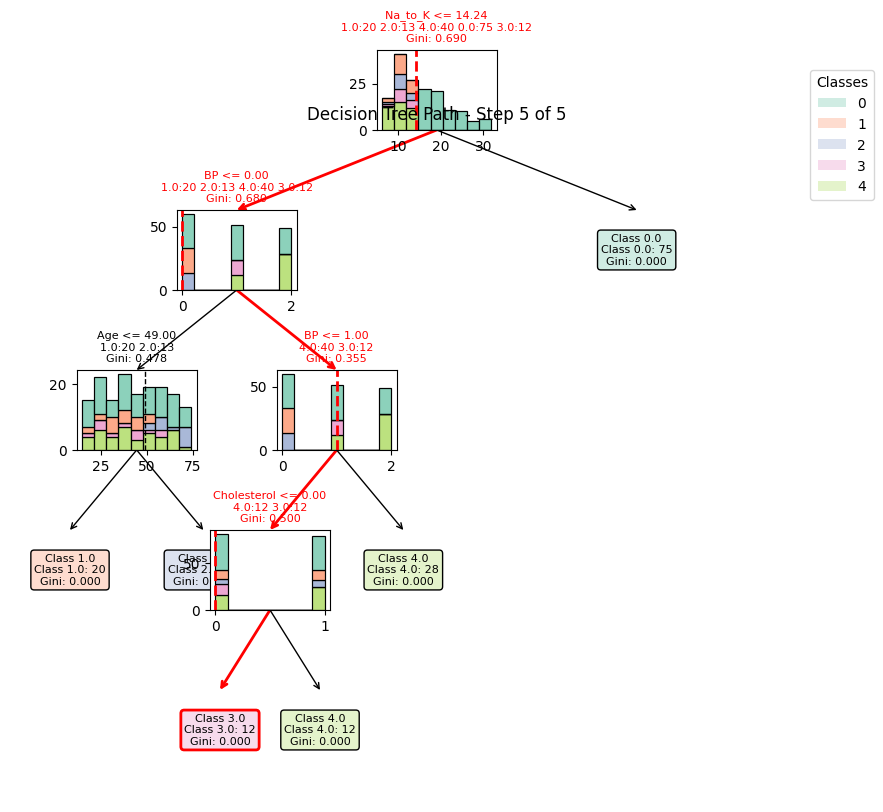

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, deque
from matplotlib.patches import Patch, ConnectionPatch

class TreeVisualization:
    def __init__(self, tree, data_df, target_col, feature_names):
        self.tree = tree
        self.data_df = data_df
        self.target_col = target_col
        self.feature_names = feature_names
        self.mode = tree.mode
        self.palette = self._create_color_palette()
        self.node_cache = {}
        self._cache_nodes(tree.root)
        
    def _create_color_palette(self):
        classes = np.unique(self.data_df[self.target_col])
        return dict(zip(classes, sns.color_palette("Set2", n_colors=len(classes))))
    
    def _calculate_impurity(self, y):
        return self._calculate_gini(y) if self.mode == 'gini' else self._calculate_entropy(y)
    
    def _calculate_entropy(self, y):
        total = len(y)
        return -sum((c/total)*np.log2(c/total) for c in Counter(y).values())
        
    def _calculate_gini(self, y):
        total = len(y)
        return 1 - sum((c/total)**2 for c in Counter(y).values())
    
    def _cache_nodes(self, root):
        queue = deque([root])
        while queue:
            node = queue.popleft()
            self.node_cache[id(node)] = node
            if getattr(node, 'left', None):
                queue.extend([node.left, node.right])
    
    def get_prediction_path(self, x):
        path, decisions = [], []
        node = self.tree.root
        while node.value is None:
            path.append(node)
            feature_val = x[node.feature_index]
            val_str = f"{feature_val:.2f}" if isinstance(feature_val, (int, float)) else str(feature_val)
            thresh_str = f"{node.threshold:.2f}" if isinstance(node.threshold, (int, float)) else str(node.threshold)
            op = "≤" if feature_val <= node.threshold else ">"
            decisions.append(f"Step {len(path)}: {self.feature_names[node.feature_index]} = {val_str} {op} {thresh_str}")
            node = node.left if feature_val <= node.threshold else node.right
        path.append(node)
        decisions.append(f"Final: Class {node.value}")
        return path, decisions
    
    def plot_prediction_path(self, x=None, step=None, fig=None, ax=None):
        fig = fig or plt.figure(figsize=(8,8))
        ax = ax or fig.add_subplot(111)
        ax.clear(); ax.set_axis_off()
    
        node_width, node_height, level_height = 0.15, 0.1, 0.2
        node_boxes, path_ids = {}, {}
    
        def get_node_positions(node, level=0, x_pos=0.5):
            pos = {id(node):(x_pos, 1 - level*level_height)}
            if getattr(node, 'left', None):
                spacing = 0.25/(level+1)
                pos.update(get_node_positions(node.left, level+1, x_pos-spacing))
                pos.update(get_node_positions(node.right, level+1, x_pos+spacing))
            return pos
    
        node_positions = get_node_positions(self.tree.root)
        if x is not None:
            prediction_path, decisions = self.get_prediction_path(x)
            if step is not None:
                prediction_path = prediction_path[:step]
            path_ids = {id(n) for n in prediction_path}
    
        for node_id, (x_pos, y) in node_positions.items():
            node = self.node_cache[node_id]
            node_boxes[node_id] = [x_pos - node_width/2, y - node_height/2, node_width, node_height]
            node_ax = fig.add_axes([x_pos - node_width/2, y - node_height/2, node_width, node_height])
            if node.value is not None:
                self._draw_leaf_node(node_ax, node, node_id in path_ids)
            else:
                self._draw_decision_node(node_ax, node, node_id in path_ids)
    
        self._draw_connections(node_positions, node_boxes, path_ids, ax)
    
        legend_elements = [
            Patch(facecolor=self.palette[cls], alpha=0.3, label=cls)
            for cls in sorted(self.data_df[self.target_col].unique())
        ]
        ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.2, 1.2), title="Classes")
    
        if x is not None:
            title = (f"Decision Tree Path - Step {step} of {len(decisions)}"
            if step is not None else f"Complete Decision Path\nFinal Prediction: Class {self.tree.predict([x])[0]}")
        else:
            title = f"Complete Decision Tree Visualization\nImpurity Measure: {self.mode.capitalize()}"
        fig.suptitle(title, fontsize=12)
        return fig, ax
    
    def _draw_leaf_node(self, ax, node, is_active):
        ax.axis('off')
        edge_color, lw = ('red', 2) if is_active else ('black', 1)
        dist = Counter(node.sample)
        txt = f"Class {node.value}\n" + "\n".join(f"Class {k}: {v}" for k, v in dist.items())
        txt += f"\n{'Gini' if self.mode=='gini' else 'Entropy'}: {self._calculate_impurity(node.sample):.3f}"
        bg_color = self.palette[max(dist, key=dist.get)]
        ax.text(0.5, 0.5, txt, ha='center', va='center',
                bbox=dict(boxstyle="round", fc=(*bg_color, 0.3), ec=edge_color, linewidth=lw),
                fontsize=8)
    
    def _draw_decision_node(self, ax, node, is_active):
        edge_color, lw = ('red', 2) if is_active else ('black', 1)
        sns.histplot(data=self.data_df, x=self.feature_names[node.feature_index],
                     hue=self.target_col, palette=self.palette, multiple="stack", ax=ax)
        ax.set(xlabel='', ylabel='')
        ax.axvline(node.threshold, color=edge_color, linestyle='--', linewidth=lw)
        if ax.get_legend(): ax.get_legend().remove()
        dist = Counter(node.sample)
        thresh_str = f"{node.threshold:.2f}" if isinstance(node.threshold, (int, float)) else str(node.threshold)
        title = (f"{self.feature_names[node.feature_index]} <= {thresh_str}\n" +
                 " ".join(f"{k}:{v}" for k, v in dist.items()) +
                 f"\n{'Gini' if self.mode=='gini' else 'Entropy'}: {self._calculate_impurity(node.sample):.3f}")
        ax.set_title(title, fontsize=8, color=edge_color)
    
    def _draw_connections(self, positions, boxes, path_ids, main_ax):
        for node_id, _ in positions.items():
            node = self.node_cache[node_id]
            if getattr(node, 'left', None):
                for child in [node.left, node.right]:
                    is_active = node_id in path_ids and id(child) in path_ids
                    self._draw_connection(node, child, boxes, is_active, main_ax)
    
    def _draw_connection(self, parent, child, boxes, is_active, main_ax):
        color, width = ('red', 2) if is_active else ('black', 1)
        p_box, c_box = boxes[id(parent)], boxes[id(child)]
        con = ConnectionPatch(xyA=(p_box[0] + p_box[2]/2, p_box[1]),
                              xyB=(c_box[0] + c_box[2]/2, c_box[1] + c_box[3]),
                              coordsA="figure fraction", coordsB="figure fraction",
                              axesA=main_ax, axesB=main_ax,
                              arrowstyle="->", color=color, linewidth=width)
        main_ax.add_artist(con)

# Example usage
def main():
    feature_names = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
    target_col = 'Drug'
    X = df_clean[feature_names].values
    Y = df_clean[target_col].values 
    model = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1, max_depth=float('inf'), mode='gini')
    data = cross_validation(X, Y, model, k=5, pruning='rep')
    data_df = pd.DataFrame(data['X_train'], columns=feature_names)
    data_df[target_col] = data['y_train'].flatten()
    viz = TreeVisualization(model, data_df, target_col, feature_names)
    new_instance = np.array([56, 0, 1, 0, 11.567, 4.841359, 0.206554, 3])
    print(new_instance)
    step = 5
    fig, ax = viz.plot_prediction_path(new_instance, step=step)
    _, decisions = viz.get_prediction_path(new_instance)
    print(decisions[step-1])
    plt.show()
    
if __name__ == "__main__":
    main()

<div style="background-color:red; padding:30px; border-radius:10px; font-size:30px; text-align:center; font=family:'Poppins';">3 | Model Evaluation</div>

In [54]:
model = DecisionTreeClassifier(max_depth=float('inf'), min_samples_split=2, min_samples_leaf=1, features=None, mode='entropy')
data = cross_validation(X, Y, model, k=5, pruning=False)
avg_accuracy = np.mean(data['accuracies'])
print(f'Avg accuracy: {avg_accuracy}')

Avg accuracy: 99.0


In [55]:
def classification_report(y_test, y_pred):
    accuracy = np.mean(y_test == y_pred)
    classes = np.unique(y_test)
    report_data = []

    for cls in classes:
        # predicted as right is right
        TP = np.sum((y_pred == cls) & (y_test == cls))
        # predicted as right is actually not 
        FP = np.sum((y_pred == cls) & (y_test != cls))
        # predicted as not right is actually right
        FN = np.sum((y_pred != cls) & (y_test == cls))

        # ratio of the real right among the predicted as right (ex: 80% is right meaning 20% is classified as right but actually not right)
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0 
        # ratio of the real right that is correctly predicted as right (ex: 70% right meaning 30% is classified as not right when actually is right)
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
        # harmony of precision and recall
        f1_score = 2 * (precision * recall) / (precision + recall)

        data = [cls, precision, recall, f1_score]
        report_data.append(data)
    
    report_df = pd.DataFrame(report_data, columns=['class', 'precision', 'recall', 'f1_score'])
    report_df.loc['accuracy'] = ['-', '-', '-', accuracy]
    return report_df

In [56]:
indices = np.concatenate([data['test_indices'], data['train_indices']])
y_pred_test = model.predict(data['X_test'])
y_pred_train = model.predict(data['X_train'])
pred = np.concatenate([y_pred_test, y_pred_train])
df_clean.loc[indices, 'pred'] = pred

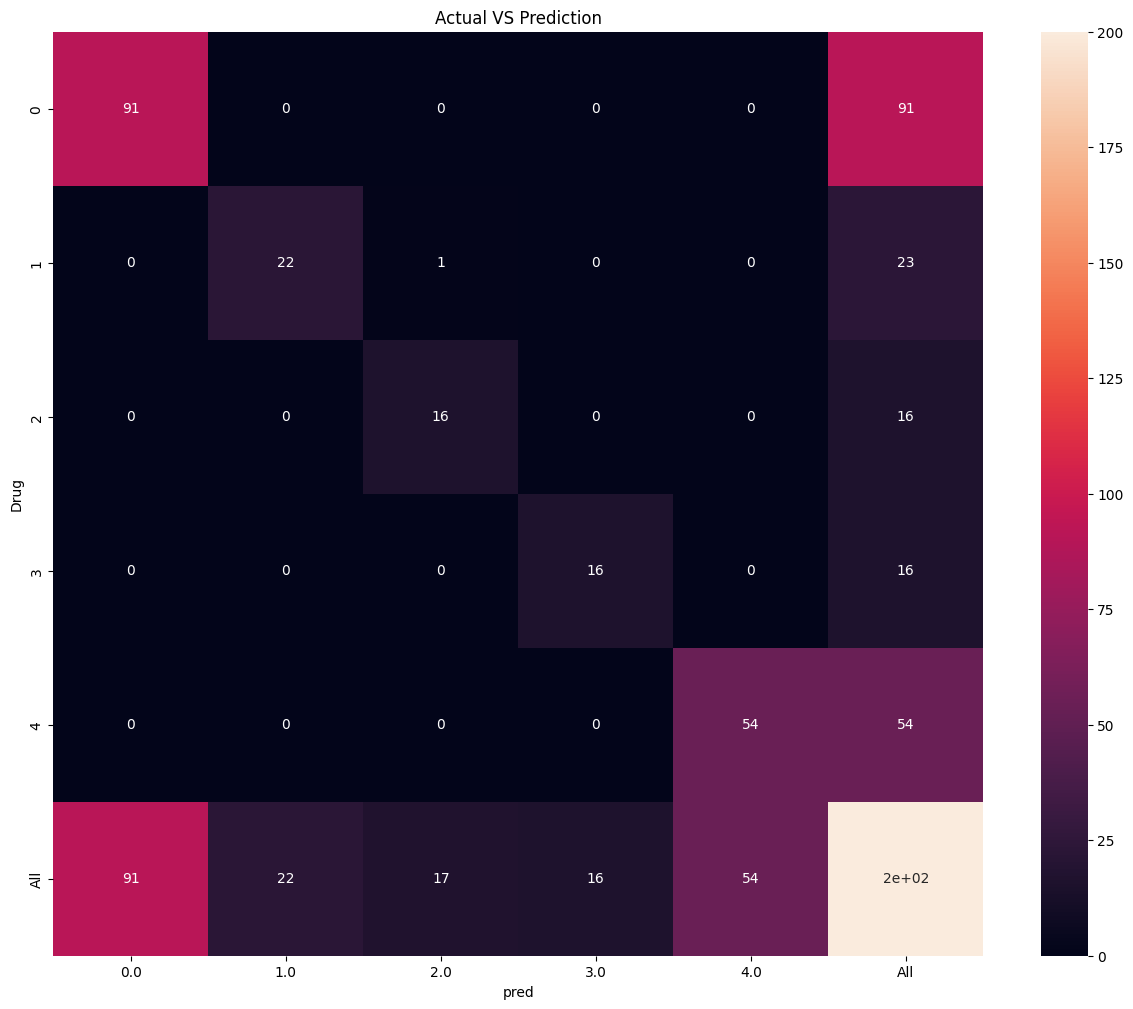

,class,precision,recall,f1_score
0,0,1.0,1.0,1.000000
1,1,1.0,0.956522,0.977778
2,2,0.941176,1.0,0.969697
3,3,1.0,1.0,1.000000
4,4,1.0,1.0,1.000000
accuracy,-,-,-,0.995000


In [57]:
sns.heatmap(pd.crosstab(df_clean['Drug'], df_clean['pred'], margins=True), annot=True)
plt.title('Actual VS Prediction')
plt.show()
report = classification_report(df_clean['Drug'], df_clean['pred'])
display(report)

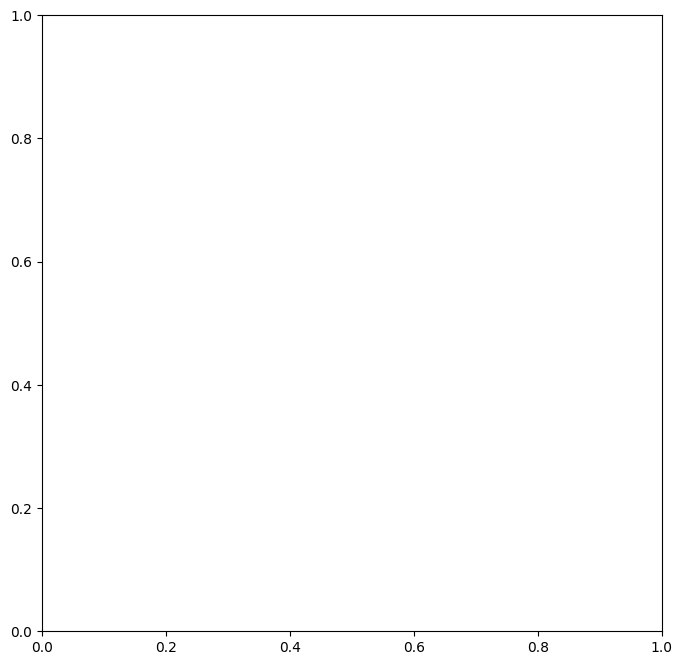

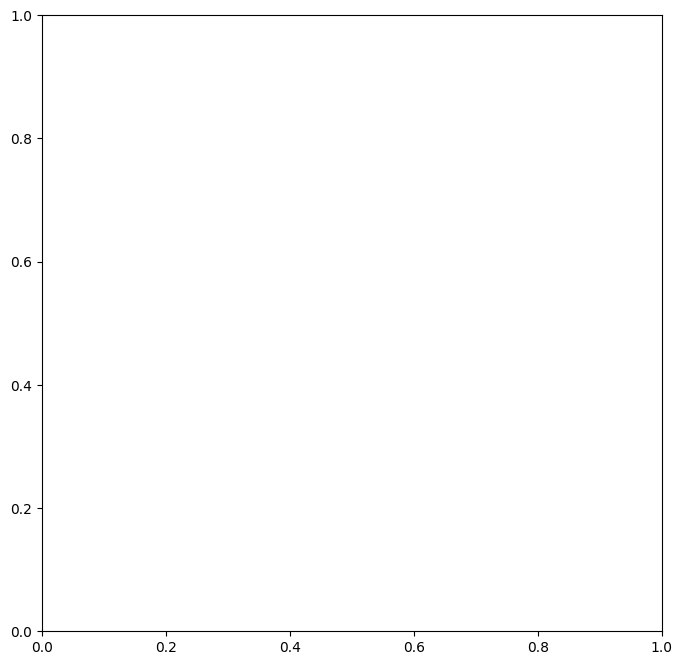

In [58]:
import tkinter as tk 
from tkinter import ttk, messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os 
import pandas as pd
import numpy as np
class TkinterApp:
    def __init__(self, root):
        self.root = root
        self.root.attributes('-fullscreen', True)
        self.root.title('Drug Diognase App')
        
        # Define columns before loading history
        self.columns = [
            'patient_name',
            'predict_label', 
            'predict_detail', 
            'accuracy',
            'timestamp',
            'pruning', 
            'min_samples_split',
            'min_samples_leaf',
            'max_depth', 
            'mode', 
            'Age', 
            'Sex',
            'BP', 
            'Cholesterol',
            'Na_to_K', 
            'Age_Na_to_K'
        ]
        
        self.history_file = "history.pkl"
        self.history = self.load_history_from_pickle()
       
        
        self.tab_control = ttk.Notebook(root)
        self.predict_tab = ttk.Frame(self.tab_control, padding="30")
        self.history_tab = ttk.Frame(self.tab_control, padding="30")
        self.setting_tab = ttk.Frame(self.tab_control, padding="30")
        
        ttk.Style().configure("TNotebook.Tab",  font=('Poppins medium', 18), padding=[25, 10])
        self.tab_control.add(self.predict_tab, text="Predict")
        self.tab_control.add(self.history_tab, text="History")
        self.tab_control.add(self.setting_tab, text="Setting")
        self.tab_control.pack(anchor='w', fill='x')
        
        self.init_predict_tab()
        self.init_history_tab()
        self.init_setting_tab()
    
    def init_predict_tab(self):
        ttk.Label(self.predict_tab, text="Drug Diognase App", font=('Poppins medium', 24)).grid(column=0, row=0, columnspan=2, sticky='w')
        ttk.Label(self.predict_tab, text="Diognase Drug with Decision Tree Algorithm", font=('Poppins', 12)).grid(column=0, row=1, columnspan=2, sticky='w')

        frame_input = ttk.Frame(self.predict_tab)
        frame_input.grid(column=0, row=2, columnspan=2, sticky='w', pady=20)

        # Age, Sex, BP, Cholesterol, Na_to_K
        ttk.Label(frame_input, text="Patient Name's Label", font=('Poppins medium', 15)).grid(column=0, row=0, sticky='w', padx=(0, 15))
        self.patiets_entry = ttk.Entry(frame_input, font=('Poppins', 18))
        self.patiets_entry.grid(column=0, row=1, sticky='w', padx=(0, 15))
        ttk.Label(frame_input, text="not effect to model", font=('Poppins italic', 12)).grid(column=0, row=3, sticky='w', padx=(0, 15))

        ttk.Label(frame_input, text="Age", font=('Poppins medium', 15)).grid(column=1, row=0, sticky='w', padx=(0, 15))
        self.age_entry = ttk.Entry(frame_input, font=('Poppins', 18))
        self.age_entry.grid(column=1, row=1, sticky='w', padx=(0, 15))
        ttk.Label(frame_input, text="Integer from range 6 - 64", font=('Poppins italic', 12)).grid(column=1, row=3, sticky='w', padx=(0, 15))
        
        ttk.Label(frame_input, text="Sex", font=('Poppins medium', 15)).grid(column=2, row=0, sticky='w', padx=(0, 15))
        self.sex_select = ttk.Combobox(frame_input, value=['Male', 'Female'], font=('Poppins', 18))
        self.sex_select.grid(column=2, row=1, sticky='w', padx=(0, 15))
        ttk.Label(frame_input, text="Integer from range 6 - 64", font=('Poppins light', 12)).grid(column=2, row=3, sticky='w', padx=(0, 15))
        
        ttk.Label(frame_input, text="Blood Presure", font=('Poppins medium', 15)).grid(column=3, row=0, sticky='w', padx=(0, 15))
        self.bp_select = ttk.Combobox(frame_input, value=['LOW', 'NORMAL', 'HIGH'], font=('Poppins', 18))
        self.bp_select.grid(column=3, row=1, sticky='w', padx=(0, 15))
        ttk.Label(frame_input, text="Integer from range 6 - 64", font=('Poppins light', 12)).grid(column=3, row=3, sticky='w', padx=(0, 15))
        
        ttk.Label(frame_input, text="Cholesterol", font=('Poppins medium', 15)).grid(column=4, row=0, sticky='w', padx=(0, 15))
        self.cholesterol_select = ttk.Combobox(frame_input, value=['NORMAL', 'HIGH'], font=('Poppins', 18))
        self.cholesterol_select.grid(column=4, row=1, sticky='w', padx=(0, 15))
        ttk.Label(frame_input, text="Integer from range 6 - 64", font=('Poppins light', 12)).grid(column=4, row=3, sticky='w', padx=(0, 15))
        
        ttk.Label(frame_input, text="Na_to_K", font=('Poppins medium', 15)).grid(column=5, row=0, sticky='w', padx=(0, 15))
        self.Na_to_K_entry = ttk.Entry(frame_input, font=('Poppins', 18))
        self.Na_to_K_entry.grid(column=5, row=1, sticky='w', padx=(0, 15))
        ttk.Label(frame_input, text="Integer from range 6 - 64", font=('Poppins light', 12)).grid(column=5, row=3, sticky='w', padx=(0, 15))
        
        ttk.Button(frame_input, text="Go Predict", command=self.predict_and_plot, style=ttk.Style().configure("TButton", font=("Helvetica", 12), padding="20 10 20 10")).grid(column=0, row=4, sticky='w')
        
        # Create a container frame for the figure and result
        fig_frame = ttk.Frame(self.predict_tab)
        fig_frame.grid(row=3, column=0, columnspan=2, sticky='w', pady=20)
        # Initialize empty figure and canvas
        self.fig, self.ax = plt.subplots(figsize=(8, 8))
        self.canvas = FigureCanvasTkAgg(self.fig, master=fig_frame)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(column=0, row=1)

        # Create result frame
        self.frame_result = ttk.Frame(fig_frame)
        self.frame_result.grid(row=1, column=1, sticky='n', padx=(30,0))
        
        self.step = ttk.Scale(fig_frame, from_=0, to=10, orient='horizontal', command=self.predict_and_plot, name="step", value=0, length=400 )
        self.step.grid(column=0, row=0)

    def predict_and_plot(self):
        age_entry = float(self.age_entry.get())
        Na_to_K_entry = float(self.Na_to_K_entry.get())
        Age_Na_to_K = age_entry / Na_to_K_entry

       # Load and prepare data
        feature_names = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
        target_col = 'Drug'

        # Split the data
        X = df_clean[feature_names].values
        Y = df_clean[target_col].values 

        # Create and train the tree with gini impurity
        model = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1, max_depth=float('inf'), mode='gini')
        data = cross_validation(X, Y, model, k=5, pruning='rep')

        # Prepare data for visualization
        data_df = pd.DataFrame(data['X_train'], columns=feature_names)
        data_df[target_col] = data['y_train'].flatten()

        # Create visualization objects
        viz_gini = TreeVisualization(model, data_df, target_col, feature_names)

        # Visualize complete trees
        new_instance = np.array([age_entry, 0 if self.sex_select.get() == 'Male' else 1, 
                                0 if self.bp_select.get() == 'LOW' else 1 if self.bp_select.get() == 'NORMAL' else 2, 
                                0 if self.cholesterol_select.get() == 'NORMAL' else 1, 
                                Na_to_K_entry])
        step = int(self.step.get())
        viz_gini.plot_prediction_path(new_instance, step=step, fig=self.fig, ax=self.ax)

        self.ax.clear()
        # Draw the new plot

        # Redraw the canvas
        self.canvas.draw()

        # Update the result frame
        new_row = {
            'patient_name': [self.patiets_entry.get()],
            'predict_label': ['Lele'],  # Replace with actual prediction
            'predict_detail': ['Lele'],  # Replace with actual prediction details
            'accuracy': [100],  # Replace with actual accuracy
            'timestamp': [datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")],
            'pruning': [self.pruning_select.get()],
            'min_samples_split': [self.min_samples_split_entry.get()],
            'min_samples_leaf': [self.min_samples_leaf_entry.get()],
            'max_depth': [self.max_depth_entry.get()],
            'mode': [self.impurity_mode_entry.get()],
            'Age': [self.age_entry.get()],
            'Sex': [self.sex_select.get()],
            'BP': [self.bp_select.get()],
            'Cholesterol': [self.cholesterol_select.get()],
            'Na_to_K': [self.Na_to_K_entry.get()],
            'Age_Na_to_K': [Age_Na_to_K],
        }

        ttk.Label(self.frame_result, text="Predict Result\nSummary", font=('Poppins Bold', 25)).grid(column=0, row=0, sticky='nsew', pady=(0, 20))

        # Row 1
        ttk.Label(self.frame_result, text="Patient Name's", font=('Poppins Light', 15)).grid(column=0, row=1, sticky='w', padx=(0, 30))
        ttk.Label(self.frame_result, text=new_row['patient_name'], font=('Poppins medium', 20)).grid(column=0, row=2, sticky='w', padx=(0, 30))

        ttk.Label(self.frame_result, text="Predict Label", font=('Poppins light', 15)).grid(column=1, row=1, sticky='w', padx=(0, 30))
        ttk.Label(self.frame_result, text=new_row['predict_label'], font=('Poppins medium', 20)).grid(column=1, row=2, sticky='w', padx=(0, 30))

        # Row 2
        ttk.Label(self.frame_result, text="Accuracy", font=('Poppins light', 15)).grid(column=0, row=3, sticky='w', padx=(0, 30))
        ttk.Label(self.frame_result, text=new_row['accuracy'], font=('Poppins medium', 20)).grid(column=0, row=4, sticky='w', padx=(0, 30))

        ttk.Label(self.frame_result, text="Detail Predict ", font=('Poppins light', 15)).grid(column=1, row=3, sticky='w', padx=(0, 30))
        ttk.Label(self.frame_result, text=new_row['predict_detail'], font=('Poppins medium', 20)).grid(column=1, row=4, sticky='w', padx=(0, 30))

        # Row 3
        ttk.Label(self.frame_result, text="Pruning", font=('Poppins light', 15)).grid(column=0, row=5, sticky='w', padx=(0, 30))
        ttk.Label(self.frame_result, text=new_row['pruning'], font=('Poppins medium', 20)).grid(column=0, row=6, sticky='w', padx=(0, 30))

        ttk.Label(self.frame_result, text="Timestamp", font=('Poppins light', 15)).grid(column=1, row=5, sticky='w', padx=(0, 30))
        ttk.Label(self.frame_result, text=new_row['timestamp'], font=('Poppins medium', 20)).grid(column=1, row=6, sticky='w', padx=(0, 30))



    def init_history_tab(self):
        ttk.Label(self.history_tab, text="History and Compare", font=('Poppins medium', 24)).grid(column=0, row=0, stick='w')
        ttk.Label(self.history_tab, text="Check your lastest prediction and compare the performance", font=('Poppins', 12)).grid(column=0, row=1, sticky='w')

        self.history_tree = ttk.Treeview(self.history_tab, columns=["patient_name", "predict_label", "timestamp"], show='headings')
        self.history_tree.heading('patient_name', text="Patient Name's")
        self.history_tree.heading('predict_label', text="Predict Label")
        self.history_tree.heading('timestamp', text="Timestamp")
        self.history_tree.grid(column=0, row=2)
        
        ttk.Button(self.history_tab, text="Compare History", command=self.compare_history, padding=10 ).grid(column=0, row=3, sticky='e', pady=10)

        #  Compare 1 frame
        self.frame_compare1 = ttk.Frame(self.history_tab)
        self.frame_compare1.grid(column=0, row=4)

        #  Compare 2 frame
        self.frame_compare2 = ttk.Frame(self.history_tab)
        self.frame_compare2.grid(column=1, row=4)
        self.update_history()
    
    def update_history(self):
        for item in self.history_tree.get_children():
            self.history_tree(item)
        for index, row in enumerate(self.history.iterrows()):
            self.history_tree.insert(item)
        

    def compare_history(self):
        self.selected_items = self.history_tree.selection()
 

        if len(self.selected_items) != 2:
            messagebox.showerror("Warning", "Please insert exact 2 row for comparing")

        item1 = self.history_tree.item(self.selected_items[0], 'values')
        item2 = self.history_tree.item(self.selected_items[1], 'values')
        
        for widget in self.frame_compare1.winfo_children():
            widget.destroy()
        for widget in self.frame_compare2.winfo_children():
            widget.destroy()

        row=1
        col=0
        for column, value in item1.items():
            label_title = column.replace('_', ' ').title()
            label_value = value[0]
            ttk.Label(self.frame_compare1, text=label_title, font=('Poppins light', 15)).grid(column=col, row=row, sticky='w', padx=(0, 30))
            ttk.Label(self.frame_compare1, text=label_value, font=('Poppins medium', 20)).grid(column=col, row=row+1, sticky='w', padx=(0, 30))
            col += 1
            if col == 2:
                col = 0
                row += 2
        row=1
        col=0

        for column, value in item2.items():
            label_title = column.replace('_', ' ').title()
            label_value = value[0]
            ttk.Label(self.frame_compare2, text=label_title, font=('Poppins light', 15)).grid(column=col, row=row, sticky='w', padx=(0, 30))
            ttk.Label(self.frame_compare2, text=label_value, font=('Poppins medium', 20)).grid(column=col, row=row+1, sticky='w', padx=(0, 30))
            col += 1
            if col == 2:
                col = 0
                row += 2
                        
    def init_setting_tab(self):
        ttk.Label(self.setting_tab, text="Set and Adjust Model", font=('Poppins medium', 24)).grid(column=0, row=0, stick='w')
        ttk.Label(self.setting_tab, text="Make the model performance on your hand", font=('Poppins', 12)).grid(column=0, row=1, sticky='w', pady=(0, 20))  

        frame_train = ttk.Frame(self.setting_tab)
        frame_train.grid(column=2, row=2, sticky='w', pady=20, padx=30 )

        frame_input = ttk.Frame(frame_train)
        frame_input.grid(column=0, row=0, sticky='w', )
        ttk.Label(frame_input, text="Model Adjust", font=('Poppins Medium', 25)).grid(column=0, row=0, sticky='nsew', pady=(0, 10))
        
        # Row 1
        ttk.Label(frame_input, text="Post-Pruning", font=('Poppins medium', 15)).grid(column=0, row=0, sticky='w', padx=(0, 30))
        self.pruning_select_var = tk.StringVar(value="False")
        self.pruning_select = ttk.Combobox(frame_input, value=['ccp', 'rep', 'False'], textvariable=self.pruning_select_var, font=('Poppins', 18))
        self.pruning_select.grid(column=0, row=1, sticky='w', padx=(0, 30))
        ttk.Label(frame_input, text="Integer from range 6 - 64", font=('Poppins light', 12)).grid(pady=(0,20), column=0, row=2, sticky='w', padx=(0, 30))
      
        
        # Row 2
        ttk.Label(frame_input, text="Min Sample Split", font=('Poppins medium', 15)).grid(column=0, row=3, sticky='w', padx=(0, 30))
        self.min_samples_split_entry_var = tk.IntVar(value=1)
        self.min_samples_split_entry = ttk.Entry(frame_input,textvariable=self.min_samples_split_entry_var, font=('Poppins', 18))
        self.min_samples_split_entry.grid(column=0, row=4, sticky='w', padx=(0, 30))
        ttk.Label(frame_input, text="Integer from range 6 - 64", font=('Poppins light', 12)).grid(pady=(0,20), column=0, row=5, sticky='w', padx=(0, 30))
        
        ttk.Label(frame_input, text="Max Depth", font=('Poppins medium', 15)).grid(column=1, row=3, sticky='w', padx=(0, 30))
        self.max_depth_entry_var = tk.IntVar(value=10)
        self.max_depth_entry = ttk.Entry(frame_input,textvariable=self.max_depth_entry_var, font=('Poppins', 18))
        self.max_depth_entry.grid(column=1, row=4, sticky='w', padx=(0, 30))
        ttk.Label(frame_input, text="Integer from range 6 - 64", font=('Poppins light', 12)).grid(pady=(0,20), column=1, row=5, sticky='w', padx=(0, 30))

        # Row 3
        ttk.Label(frame_input, text="Impurity Mode", font=('Poppins medium', 15)).grid(column=0, row=6, sticky='w', padx=(0, 30))
        self.impurity_mode_entry_var = tk.StringVar(value="gini")
        self.impurity_mode_entry = ttk.Combobox(frame_input,textvariable=self.impurity_mode_entry_var, value=['gini', 'entropy'], font=('Poppins', 18))
        self.impurity_mode_entry.grid(column=0, row=7, sticky='w', padx=(0, 30))
        ttk.Label(frame_input, text="Integer from range 6 - 64", font=('Poppins light', 12)).grid(pady=(0,20), column=0, row=8, sticky='w', padx=(0, 30))

        ttk.Label(frame_input, text="Min Samples Leaf", font=('Poppins medium', 15)).grid(column=1, row=6, sticky='w', padx=(0, 30))
        self.min_samples_leaf_entry_var = tk.IntVar(value=10)
        self.min_samples_leaf_entry = ttk.Entry(frame_input, textvariable=self.min_samples_leaf_entry_var, font=('Poppins', 18))
        self.min_samples_leaf_entry.grid(column=1, row=7, sticky='w', padx=(0, 30))
        ttk.Label(frame_input, text="Integer from range 6 - 64", font=('Poppins light', 12)).grid(pady=(0,20), column=1, row=8, sticky='w', padx=(0, 30))
        
        ttk.Button(frame_input, text="Train Model", command=self.predict_and_plot, style=ttk.Style().configure("TButton", font=("Helvetica", 12), padding="20 10 20 10")).grid(column=0, row=10, sticky='w')

        self.training_result_frame = ttk.Frame(frame_train)
        self.training_result_frame.grid(row=11, column=0, sticky='w')
        
        ttk.Label(self.training_result_frame, text="Model Summary", font=('Poppins Medium', 25)).grid(column=0, row=0, sticky='nsew', pady=(0, 10))

        # Row 1 
        ttk.Label(self.training_result_frame, text="Model Accuracy", font=('Poppins Light', 15)).grid(column=0, row=1, sticky='w', padx=(0, 30))
        ttk.Label(self.training_result_frame, text=['patient_name'], font=('Poppins medium', 20)).grid(column=0, row=2, sticky='w', padx=(0, 30))

        ttk.Label(self.training_result_frame, text="Precision", font=('Poppins light', 15)).grid(column=1, row=1, sticky='w', padx=(0, 30))
        ttk.Label(self.training_result_frame, text=['predict_label'], font=('Poppins medium', 20)).grid(column=1, row=2, sticky='w', padx=(0, 30))

        # Row 2
        ttk.Label(self.training_result_frame, text="Recall", font=('Poppins light', 15)).grid(column=0, row=3, sticky='w', padx=(0, 30))
        ttk.Label(self.training_result_frame, text=['accuracy'], font=('Poppins medium', 20)).grid(column=0, row=4, sticky='w', padx=(0, 30))
        ttk.Label(self.training_result_frame, text="F-1 Score ", font=('Poppins light', 15)).grid(column=1, row=3, sticky='w', padx=(0, 30))
        ttk.Label(self.training_result_frame, text=['predict_detail'], font=('Poppins medium', 20)).grid(column=1, row=4, sticky='w', padx=(0, 30))

        # Create a figure frame
        self.fig_frame = ttk.Frame(self.setting_tab)
        self.fig_frame.grid(row=2, column=0, sticky='w')

        # Initialize empty figure and canvas
        self.fig, self.ax = plt.subplots(figsize=(8, 8))
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.fig_frame)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side='right', expand=True)

    def load_history_from_pickle(self):
        if os.path.exists(self.history_file):
            return pd.read_pickle('history.pkl')
        else:
            new_history = pd.DataFrame(columns=self.columns)
            self.history = new_history
            self.save_to_pickle()  # Save the new file to disk
            return new_history
       


    def save_to_pickle(self):
        self.history.to_pickle(self.history_file)
       

if __name__ == "__main__":
    root = tk.Tk()
    app = TkinterApp(root)
    root.mainloop()